In [1]:
import pandas as pd; from scipy import stats;

In [2]:
from phcalc import calc_pH

In [3]:
#file is named by 2 digit date m, d, y and short name of VELMA run created in DOC check which is the precursor for the pH calculation
data_df=pd.read_csv('111821_WQX_Loss_15NOV21A.csv') #can change path -cp with true file directory but copying in this folder
#data_df['Alk_1000'] = 1000
data_df['Alk_140'] = 140
#data_df['DOC_g/m3'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/0.35
#data_df['DOC_g/m3_run'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/data_df['Runoff_All(mm/day)_Delineated_Average']
#data_df['CO2_2'] = data_df['DOC_g/m3']/4
data_df.head()

Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
0           0                                0.000128     0   
1           1                                0.000011     1   
2           2                                0.000007     2   
3           3                                0.000006     3   
4           4                                0.000005     4   

   Runoff_All(mm/day)_Delineated_Average  Year  \
0                               3.575873  1998   
1                               0.725718  1998   
2                               0.445550  1998   
3                               0.409570  1998   
4                               0.383245  1998   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000026   
1                                0.000003   
2                                0.000002   
3                                0.000002   
4                                0.000001   

   DON_Loss(gN/day/m2)_Delineated_Average  \
0                                0.001146   
1                                0.000104   
2                                0.000071   
3                                0.000060   
4                                0.000052   

   DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.038477  0.109935            2.6375   
1                                0.003461  0.009887            3.3125   
2                                0.002371  0.006773            0.7625   
3                                0.001990  0.005685            0.0875   
4                                0.001735  0.004958            3.0875   

        CO2  Alk_140  
0  0.027484      140  
1  0.002472      140  
2  0.001693      140  
3  0.001421      140  
4  0.001240      140

In [4]:
#Check for any zero runoff days should equal 0
data_df.loc[data_df['Runoff_All(mm/day)_Delineated_Average'] ==0]

Empty DataFrame
Columns: [Unnamed: 0, NO3_Loss(gN/day/m2)_Delineated_Average, Step, Runoff_All(mm/day)_Delineated_Average, Year, NH4_Loss(gN/day/m2)_Delineated_Average, DON_Loss(gN/day/m2)_Delineated_Average, DOC_Loss(gC/day/m2)_Delineated_Average, DOC_mg/L, Sfc_Water_Temp_C, CO2, Alk_140]
Index: []

In [5]:
pools_di=pd.read_csv('BC15NOV21AWQDI_pHcalc.csv') #need to change paths or copy and paste file in dir

In [6]:
#VELMA Simulation focusing on Water Quality Parameters Before renaming as concentrations
pools_di.drop(columns={'Unnamed: 0','Criteria', 'Condition'})

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                               4.914788                          178.332923   
1                               4.915756                          178.490644   
2                               4.916769                          178.652420   
3                               4.917760                          178.812267   
4                               4.918732                          178.964615   
...                                  ...                                 ...   
1973                            6.086807                          528.077611   
1974                            6.087007                          528.098319   
1975                            6.087189                          528.121512   
1976                            6.087394                          528.162711   
1977                            6.087593                          528.185250   

      NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                               0.653125                            0.017828   
1                               0.656919                            0.018524   
2                               0.652829                            0.018773   
3                               0.649688                            0.018661   
4                               0.648913                            0.018417   
...                                  ...                                 ...   
1973                            3.674864                            0.906279   
1974                            3.687916                            0.906272   
1975                            3.700294                            0.906249   
1976                            3.713091                            0.906257   
1977                            3.724946                            0.906248   

      Step  Runoff_All(mm/day)_Delineated_Average  Sfc_Water_Temp_C  
0     1309                               0.014678         20.112500  
1     1310                               0.022895         19.737500  
2     1311                               0.028913         19.962502  
3     1312                               0.020604         19.812500  
4     1313                               0.015854         19.287498  
...    ...                                    ...               ...  
1973  3282                               0.006345         -1.562500  
1974  3283                               0.006192         -2.837500  
1975  3284                               0.006042         -0.812500  
1976  3285                               0.005902          4.512500  
1977  3286                               0.005772         -2.087500  

[1978 rows x 7 columns]

In [7]:
#Defining Percentiles list for tails and distrubition interval
perc = [0.1, 0.25, 0.5, .75, .9]

In [8]:
pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'}).describe(percentiles =perc)

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             5.466904                          341.321452   
std                              0.341246                          107.961020   
min                              4.914788                          178.332923   
10%                              5.002670                          189.913659   
25%                              5.175553                          247.848004   
50%                              5.434618                          333.112891   
75%                              5.766832                          439.566531   
90%                              5.922162                          483.193821   
max                              6.087593                          528.185250   

       NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             2.924672                            0.587975   
std                              1.178387                            0.353027   
min                              0.635450                            0.001144   
10%                              1.065405                            0.003425   
25%                              2.106638                            0.315127   
50%                              2.934099                            0.617129   
75%                              3.819941                            0.837964   
90%                              4.538813                            1.013326   
max                              5.008792                            1.503220   

              Step  Runoff_All(mm/day)_Delineated_Average  
count  1978.000000                            1978.000000  
mean   2297.500000                               0.062458  
std     571.143736                               0.600690  
min    1309.000000                               0.000163  
10%    1506.700000                               0.001438  
25%    1803.250000                               0.005755  
50%    2297.500000                               0.016546  
75%    2791.750000                               0.044610  
90%    3088.300000                               0.118245  
max    3286.000000                              26.255497

In [9]:
#Loss Stats 
data_df.describe(percentiles=perc).drop(columns='Year')

Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average         Step  \
count  3287.000000                            3.287000e+03  3287.000000   
mean   1643.000000                            3.363624e-06  1643.000000   
std     949.019494                            1.218595e-05   949.019494   
min       0.000000                            1.490396e-11     0.000000   
10%     328.600000                            2.183020e-10   328.600000   
25%     821.500000                            1.307555e-09   821.500000   
50%    1643.000000                            1.791758e-07  1643.000000   
75%    2464.500000                            1.568081e-06  2464.500000   
90%    2957.400000                            7.760513e-06  2957.400000   
max    3286.000000                            2.509073e-04  3286.000000   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.045830   
std                                 0.472027   
min                                 0.000014   
10%                                 0.000240   
25%                                 0.001181   
50%                                 0.008562   
75%                                 0.030329   
90%                                 0.088680   
max                                26.255497   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             2.291198e-06   
std                              7.212038e-06   
min                              1.088731e-09   
10%                              1.042981e-08   
25%                              4.258854e-08   
50%                              2.995096e-07   
75%                              1.563718e-06   
90%                              5.306916e-06   
max                              1.631130e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             1.368445e-05   
std                              3.597896e-05   
min                              1.531147e-07   
10%                              4.551896e-07   
25%                              1.189261e-06   
50%                              4.687644e-06   
75%                              1.334588e-05   
90%                              3.263766e-05   
max                              1.146204e-03   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             3287.000000  3287.000000       3287.000000   
mean                                 0.001565     0.004472         11.248536   
std                                  0.004361     0.012461          6.931090   
min                                  0.000010     0.000029        -10.562500   
10%                                  0.000028     0.000081          2.262500   
25%                                  0.000083     0.000236          5.787500   
50%                                  0.000518     0.001481         11.112499   
75%                                  0.001659     0.004741         17.712502   
90%                                  0.003639     0.010396         20.412498   
max                                  0.181567     0.518762         24.087502   

               CO2  Alk_140  
count  3287.000000   3287.0  
mean      0.001118    140.0  
std       0.003115      0.0  
min       0.000007    140.0  
10%       0.000020    140.0  
25%       0.000059    140.0  
50%       0.000370    140.0  
75%       0.001185    140.0  
90%       0.002599    140.0  
max       0.129690    140.0

In [10]:
stats.describe(data_df['DOC_Loss(gC/day/m2)_Delineated_Average'])

DescribeResult(nobs=3287, minmax=(1.0184920029132629e-05, 0.1815665662288665), mean=0.0015650552596659095, variance=1.9021141336921075e-05, skewness=23.195922922170027, kurtosis=890.951870273265)

In [11]:
stats.describe(data_df['DOC_mg/L'])

DescribeResult(nobs=3287, minmax=(2.909977151180751e-05, 0.5187616177967614), mean=0.004471586456188323, variance=0.00015527462315853907, skewness=23.195922922170112, kurtosis=890.9518702732688)

In [12]:
"""these are corrected columns needed for pH calculation...."""
row=data_df.iloc[0,:]
[row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']]

[0.0274836351828915, 2.6374998, 0.1099345407315663, 140.0]

In [13]:
215/(12*0.35)

51.1904761904762

In [14]:
"""This works, but the next is better if you need the calculation back in the dataframe"""
id_list =[]; row_list =[];
for row_id,row in data_df.iterrows():
    row_list.append(calc_pH(row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']))
    id_list.append(row_id)

CO2 Estimate 0.6246280723384432
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 6.012930948721311e-07
SQRT of Alpha= 0.000775430909154472
A value 3.1104568917377766
B value 0.43429448190325176
C value 0.001550861818308944

CO2 Estimate 0.056177268088975
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 5.494267667125262e-08
SQRT of Alpha= 0.00023439854238295216
A value 3.6300450933237793
B value 0.43429448190325176
C value 0.00046879708476590433

CO2 Estimate 0.038485280117138636
Exponent value 6.036186488318765
H2CO3 value 9.200544107479032e-07
pkw= 1e-14
Alpha value= 3.5408561720641985e-08
SQRT of Alpha= 0.00018817162836262533
A value 3.725445856862044
B value 0.43429448190325176
C value 0.00037634325672525066

CO2 Estimate 0.03229998665946364
Exponent value 6.043450946767136
H2CO3 value 9.047926276090163e-07
pkw= 1e-14
Alpha value= 2.922479980135228e-08
SQRT of Alpha= 0.00017095262443540398
A value 3

CO2 Estimate 0.020786299666556818
Exponent value 5.968385845250001
H2CO3 value 1.0755092619547499e-06
pkw= 1e-14
Alpha value= 2.2355867813148786e-08
SQRT of Alpha= 0.0001495187874922372
A value 3.8253042334829273
B value 0.43429448190325176
C value 0.0002990375749844744

CO2 Estimate 0.05407448610072954
Exponent value 5.981692495250001
H2CO3 value 1.0430557096912576e-06
pkw= 1e-14
Alpha value= 5.64027114759865e-08
SQRT of Alpha= 0.00023749255035892495
A value 3.6243500087286025
B value 0.43429448190325176
C value 0.0004749851007178499

CO2 Estimate 0.08336649360981818
Exponent value 6.01962731525
H2CO3 value 9.558124535127698e-07
pkw= 1e-14
Alpha value= 7.968274279795696e-08
SQRT of Alpha= 0.00028228131854226017
A value 3.549317862634069
B value 0.43429448190325176
C value 0.0005645626370845203

CO2 Estimate 0.04515005729173183
Exponent value 6.00062816525
H2CO3 value 9.985546415974415e-07
pkw= 1e-14
Alpha value= 4.508480927704923e-08
SQRT of Alpha= 0.00021233183764346136
A value 3.672

SQRT of Alpha= 0.00017415961088696212
A value 3.759052554280662
B value 0.43429448190325176
C value 0.00034831922177392424

CO2 Estimate 0.017251760408570453
Exponent value 5.883646268941441
H2CO3 value 1.3072351922925973e-06
pkw= 1e-14
Alpha value= 2.2552118335083412e-08
SQRT of Alpha= 0.00015017362729548558
A value 3.8234063291540084
B value 0.43429448190325176
C value 0.00030034725459097115

CO2 Estimate 0.013577651274813635
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 1.7957704192986762e-08
SQRT of Alpha= 0.00013400635877818171
A value 3.8728745933012023
B value 0.43429448190325176
C value 0.00026801271755636343

CO2 Estimate 0.010942787010609092
Exponent value 5.873626088279041
H2CO3 value 1.3377467720970873e-06
pkw= 1e-14
Alpha value= 1.463868800118825e-08
SQRT of Alpha= 0.00012099044590870905
A value 3.917248922683125
B value 0.43429448190325176
C value 0.0002419808918174181

CO2 Estimate 0.008988012174179546
Exponent value 5.873138

CO2 Estimate 0.0004750436405570384
Exponent value 5.887270687250001
H2CO3 value 1.296371016445193e-06
pkw= 1e-14
Alpha value= 6.158428071647528e-10
SQRT of Alpha= 2.4816180350020685e-05
A value 4.60526506331133
B value 0.43429448190325176
C value 4.963236070004137e-05

CO2 Estimate 0.000486429480706529
Exponent value 5.901265681250001
H2CO3 value 1.2552618177172073e-06
pkw= 1e-14
Alpha value= 6.106063541429149e-10
SQRT of Alpha= 2.4710450302309647e-05
A value 4.607119340311139
B value 0.43429448190325176
C value 4.9420900604619294e-05

CO2 Estimate 0.000463038546726026
Exponent value 5.89905796457596
H2CO3 value 1.26165913176674e-06
pkw= 1e-14
Alpha value= 5.842068108368909e-10
SQRT of Alpha= 2.4170370515093288e-05
A value 4.616716692106742
B value 0.43429448190325176
C value 4.8340741030186575e-05

CO2 Estimate 0.0004305446338265312
Exponent value 5.89470212525
H2CO3 value 1.2743768534226815e-06
pkw= 1e-14
Alpha value= 5.486861157138754e-10
SQRT of Alpha= 2.342404994260974e-05
A value

Exponent value 5.958197305250001
H2CO3 value 1.1010389805356328e-06
pkw= 1e-14
Alpha value= 3.3706896168912584e-10
SQRT of Alpha= 1.835943794589382e-05
A value 4.736140618381682
B value 0.43429448190325176
C value 3.671887589178764e-05

CO2 Estimate 0.00030939373845013783
Exponent value 5.98815213725
H2CO3 value 1.0276562378720133e-06
pkw= 1e-14
Alpha value= 3.179604052768263e-10
SQRT of Alpha= 1.7831444284656986e-05
A value 4.748813479065036
B value 0.43429448190325176
C value 3.566288856931397e-05

CO2 Estimate 0.00030301375123339573
Exponent value 5.986707967250001
H2CO3 value 1.0310792162483818e-06
pkw= 1e-14
Alpha value= 3.124411811342118e-10
SQRT of Alpha= 1.7676005802618753e-05
A value 4.752615864541013
B value 0.43429448190325176
C value 3.5352011605237506e-05

CO2 Estimate 0.000294221329320201
Exponent value 5.978853835250001
H2CO3 value 1.0498957187145257e-06
pkw= 1e-14
Alpha value= 3.0891171400777557e-10
SQRT of Alpha= 1.7575884444538647e-05
A value 4.755082811416641
B value

B value 0.43429448190325176
C value 2.7346211345880753e-05

CO2 Estimate 0.00020332920455559786
Exponent value 6.025086181250001
H2CO3 value 9.438735557516796e-07
pkw= 1e-14
Alpha value= 1.9192705929205275e-10
SQRT of Alpha= 1.3853774189442124e-05
A value 4.858431895454663
B value 0.43429448190325176
C value 2.7707548378884248e-05

CO2 Estimate 0.00020125780084326124
Exponent value 6.025870986202764
H2CO3 value 9.421694407517647e-07
pkw= 1e-14
Alpha value= 1.896289496674255e-10
SQRT of Alpha= 1.37705827642633e-05
A value 4.861047680226127
B value 0.43429448190325176
C value 2.75411655285266e-05

CO2 Estimate 0.00019954772933606247
Exponent value 5.99471238125
H2CO3 value 1.012249611479344e-06
pkw= 1e-14
Alpha value= 2.0200211149201456e-10
SQRT of Alpha= 1.4212744685387638e-05
A value 4.847322045463475
B value 0.43429448190325176
C value 2.8425489370775277e-05

CO2 Estimate 0.00019312913288806817
Exponent value 5.96976543125
H2CO3 value 1.0720982046808511e-06
pkw= 1e-14
Alpha value= 2.0

CO2 Estimate 0.0004145107737571521
Exponent value 5.937395745652361
H2CO3 value 1.1550592285846932e-06
pkw= 1e-14
Alpha value= 4.787944945759803e-10
SQRT of Alpha= 2.188137323332291e-05
A value 4.659925425988513
B value 0.43429448190325176
C value 4.376274646664582e-05

CO2 Estimate 0.00038593223554878985
Exponent value 5.91786596937756
H2CO3 value 1.2081866444090015e-06
pkw= 1e-14
Alpha value= 4.662881726369567e-10
SQRT of Alpha= 2.159370678315691e-05
A value 4.66567280012569
B value 0.43429448190325176
C value 4.318741356631382e-05

CO2 Estimate 0.0003691770398763293
Exponent value 5.9437596072500005
H2CO3 value 1.1382571650075385e-06
pkw= 1e-14
Alpha value= 4.2022841079550555e-10
SQRT of Alpha= 2.0499473427273822e-05
A value 4.688257294581633
B value 0.43429448190325176
C value 4.0998946854547645e-05

CO2 Estimate 0.0004610026369302975
Exponent value 5.99914176725
H2CO3 value 1.0019781078155023e-06
pkw= 1e-14
Alpha value= 4.6192454984937646e-10
SQRT of Alpha= 2.1492430059194714e-05


H2CO3 value 1.2994843719519987e-06
pkw= 1e-14
Alpha value= 7.475094840193796e-10
SQRT of Alpha= 2.734061967145916e-05
A value 4.56319164643076
B value 0.43429448190325176
C value 5.468123934291832e-05

CO2 Estimate 0.0005856391707512358
Exponent value 5.88519213125
H2CO3 value 1.3025903868631068e-06
pkw= 1e-14
Alpha value= 7.628579539910414e-10
SQRT of Alpha= 2.7619883308787555e-05
A value 4.558778160603756
B value 0.43429448190325176
C value 5.523976661757511e-05

CO2 Estimate 0.0005469503291835706
Exponent value 5.8831334472500005
H2CO3 value 1.3087797076915556e-06
pkw= 1e-14
Alpha value= 7.158474919506737e-10
SQRT of Alpha= 2.675532642205424e-05
A value 4.572589746149934
B value 0.43429448190325176
C value 5.351065284410848e-05

CO2 Estimate 0.00051306639537185
Exponent value 5.89255401725
H2CO3 value 1.2806957925646396e-06
pkw= 1e-14
Alpha value= 6.570919738590342e-10
SQRT of Alpha= 2.5633805294162513e-05
A value 4.591186918763607
B value 0.43429448190325176
C value 5.1267610588325

H2CO3 value 1.250447563750427e-06
pkw= 1e-14
Alpha value= 4.181314202355698e-09
SQRT of Alpha= 6.466308222127753e-05
A value 4.189343598212093
B value 0.43429448190325176
C value 0.00012932616444255506

CO2 Estimate 0.0030092437023613635
Exponent value 5.892020095250001
H2CO3 value 1.2822712492807374e-06
pkw= 1e-14
Alpha value= 3.858676681617097e-09
SQRT of Alpha= 6.211824757361637e-05
A value 4.206780804711726
B value 0.43429448190325176
C value 0.00012423649514723274

CO2 Estimate 0.0027030470740204544
Exponent value 5.88779343125
H2CO3 value 1.2948115619291286e-06
pkw= 1e-14
Alpha value= 3.499946603880385e-09
SQRT of Alpha= 5.916034654969818e-05
A value 4.227969290655861
B value 0.43429448190325176
C value 0.00011832069309939636

CO2 Estimate 0.0025152288586659088
Exponent value 5.89095597725
H2CO3 value 1.2854169510790212e-06
pkw= 1e-14
Alpha value= 3.2331278107722988e-09
SQRT of Alpha= 5.686059981016995e-05
A value 4.245188563342849
B value 0.43429448190325176
C value 0.0001137211

Exponent value 6.025086181250001
H2CO3 value 9.438735557516796e-07
pkw= 1e-14
Alpha value= 5.630139218965837e-10
SQRT of Alpha= 2.3727914402588856e-05
A value 4.6247404330111745
B value 0.43429448190325176
C value 4.745582880517771e-05

CO2 Estimate 0.0005786576177531781
Exponent value 5.98526876525
H2CO3 value 1.0345017620997845e-06
pkw= 1e-14
Alpha value= 5.986323252181263e-10
SQRT of Alpha= 2.4466963955875817e-05
A value 4.611419917816725
B value 0.43429448190325176
C value 4.8933927911751634e-05

CO2 Estimate 0.0006085563111444029
Exponent value 5.968385845250001
H2CO3 value 1.0755092619547499e-06
pkw= 1e-14
Alpha value= 6.545179490568219e-10
SQRT of Alpha= 2.558354840628684e-05
A value 4.592039219576133
B value 0.43429448190325176
C value 5.116709681257368e-05

CO2 Estimate 0.0008103173165075638
Exponent value 6.012698199288169
H2CO3 value 9.71184630190219e-07
pkw= 1e-14
Alpha value= 7.869777233691291e-10
SQRT of Alpha= 2.805312323733543e-05
A value 4.552018780424526
B value 0.434

pkw= 1e-14
Alpha value= 1.8128987645050197e-09
SQRT of Alpha= 4.257814890885957e-05
A value 4.37081322350227
B value 0.43429448190325176
C value 8.515629781771914e-05

CO2 Estimate 0.0013613586001061872
Exponent value 5.943117631250001
H2CO3 value 1.1399409859294848e-06
pkw= 1e-14
Alpha value= 1.5518784648086304e-09
SQRT of Alpha= 3.939388867335428e-05
A value 4.404571146735347
B value 0.43429448190325176
C value 7.878777734670856e-05

CO2 Estimate 0.0012357539564216897
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 1.236093087582211e-09
SQRT of Alpha= 3.515811552945082e-05
A value 4.45397441110378
B value 0.43429448190325176
C value 7.031623105890164e-05

CO2 Estimate 0.0011643263766112702
Exponent value 6.00286707725
H2CO3 value 9.934200539409684e-07
pkw= 1e-14
Alpha value= 1.1566751718580604e-09
SQRT of Alpha= 3.4009927548556475e-05
A value 4.468394293245039
B value 0.43429448190325176
C value 6.801985509711295e-05

CO2 Estimate 0.0010955

Exponent value 5.868326737250001
H2CO3 value 1.3541702321465438e-06
pkw= 1e-14
Alpha value= 4.758923595071871e-10
SQRT of Alpha= 2.1814957242845724e-05
A value 4.661245633890288
B value 0.43429448190325176
C value 4.362991448569145e-05

CO2 Estimate 0.00033699805428184776
Exponent value 5.8590765972500005
H2CO3 value 1.3833223785548223e-06
pkw= 1e-14
Alpha value= 4.661869500175127e-10
SQRT of Alpha= 2.1591362856881285e-05
A value 4.665719943930574
B value 0.43429448190325176
C value 4.318272571376257e-05

CO2 Estimate 0.00032217453086299695
Exponent value 5.86043244725
H2CO3 value 1.3790104357828409e-06
pkw= 1e-14
Alpha value= 4.4429204020351374e-10
SQRT of Alpha= 2.107823617391915e-05
A value 4.676165733686403
B value 0.43429448190325176
C value 4.21564723478383e-05

CO2 Estimate 0.0003083812759553427
Exponent value 5.884160291525442
H2CO3 value 1.305688889164971e-06
pkw= 1e-14
Alpha value= 4.026600056414078e-10
SQRT of Alpha= 2.006638995039735e-05
A value 4.697530752357722
B value 0.

B value 0.43429448190325176
C value 0.00020727683054667614

CO2 Estimate 0.005478311334613637
Exponent value 5.88674917135984
H2CO3 value 1.2979286788248891e-06
pkw= 1e-14
Alpha value= 7.110467392726492e-09
SQRT of Alpha= 8.432358740427552e-05
A value 4.0740509254149755
B value 0.43429448190325176
C value 0.00016864717480855103

CO2 Estimate 0.0039575657959977275
Exponent value 5.909721631250001
H2CO3 value 1.2310575861743383e-06
pkw= 1e-14
Alpha value= 4.872001395947086e-09
SQRT of Alpha= 6.979972346612188e-05
A value 4.156146297969607
B value 0.43429448190325176
C value 0.00013959944693224375

CO2 Estimate 0.003167400578815909
Exponent value 5.902934515250001
H2CO3 value 1.250447563750427e-06
pkw= 1e-14
Alpha value= 3.960678337202046e-09
SQRT of Alpha= 6.293392040229216e-05
A value 4.201115213492462
B value 0.43429448190325176
C value 0.00012586784080458432

CO2 Estimate 0.00240164123855
Exponent value 5.89255401725
H2CO3 value 1.2806957925646396e-06
pkw= 1e-14
Alpha value= 3.0757818

H2CO3 value 9.76313185740464e-07
pkw= 1e-14
Alpha value= 2.302584914472984e-10
SQRT of Alpha= 1.5174270705615424e-05
A value 4.818892172485849
B value 0.43429448190325176
C value 3.0348541411230848e-05

CO2 Estimate 0.00023472333756311764
Exponent value 6.005117167250001
H2CO3 value 9.882864312992452e-07
pkw= 1e-14
Alpha value= 2.319838896229016e-10
SQRT of Alpha= 1.5231017353509306e-05
A value 4.8172710870606155
B value 0.43429448190325176
C value 3.046203470701861e-05

CO2 Estimate 0.00023256647678367284
Exponent value 6.066694840640109
H2CO3 value 8.576402591142854e-07
pkw= 1e-14
Alpha value= 1.9946837341004563e-10
SQRT of Alpha= 1.4123327278302575e-05
A value 4.850062976911758
B value 0.43429448190325176
C value 2.824665455660515e-05

CO2 Estimate 0.00023216415825885771
Exponent value 6.044264318026007
H2CO3 value 9.030996666542483e-07
pkw= 1e-14
Alpha value= 2.0967737393263856e-10
SQRT of Alpha= 1.4480240810588703e-05
A value 4.839224215636093
B value 0.43429448190325176
C value 2

A value 4.376434831759193
B value 0.43429448190325176
C value 8.406111841553747e-05

CO2 Estimate 0.0015994174209009106
Exponent value 5.988876085250001
H2CO3 value 1.0259446113774308e-06
pkw= 1e-14
Alpha value= 1.6409236843164774e-09
SQRT of Alpha= 4.050831623650232e-05
A value 4.3924558082702045
B value 0.43429448190325176
C value 8.101663247300464e-05

CO2 Estimate 0.0014595843822462484
Exponent value 5.971149985250001
H2CO3 value 1.0686857408021785e-06
pkw= 1e-14
Alpha value= 1.5598470168041223e-09
SQRT of Alpha= 3.949489861746859e-05
A value 4.4034589966611515
B value 0.43429448190325176
C value 7.898979723493718e-05

CO2 Estimate 0.0013213842999879512
Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 1.4234239808898083e-09
SQRT of Alpha= 3.772829151829974e-05
A value 4.423332860873071
B value 0.43429448190325176
C value 7.545658303659949e-05

CO2 Estimate 0.001330871156540808
Exponent value 5.9969214852500015
H2CO3 value 1.00711372535582

Exponent value 5.866907532684642
H2CO3 value 1.3586026811387132e-06
pkw= 1e-14
Alpha value= 7.324328285308524e-10
SQRT of Alpha= 2.7063496236274655e-05
A value 4.567616099163406
B value 0.43429448190325176
C value 5.412699247254931e-05

CO2 Estimate 0.0005241527814378769
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 6.980294552661078e-10
SQRT of Alpha= 2.6420247070497048e-05
A value 4.578063125372067
B value 0.43429448190325176
C value 5.2840494140994096e-05

CO2 Estimate 0.0005123848649264954
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 6.776861699965762e-10
SQRT of Alpha= 2.6032406150730212e-05
A value 4.584485688606472
B value 0.43429448190325176
C value 5.2064812301460425e-05

CO2 Estimate 0.0005145183977574207
Exponent value 5.880588037250001
H2CO3 value 1.3164730191343728e-06
pkw= 1e-14
Alpha value= 6.773595884958916e-10
SQRT of Alpha= 2.602613279947468e-05
A value 4.584590358537724
B value 0

A value 3.210596627077464
B value 0.43429448190325176
C value 0.0012314970294261959

CO2 Estimate 0.26158075295872274
Exponent value 5.901265681250001
H2CO3 value 1.2552618177172073e-06
pkw= 1e-14
Alpha value= 3.2835234143880205e-07
SQRT of Alpha= 0.0005730203673856646
A value 3.241829941233304
B value 0.43429448190325176
C value 0.0011460407347713291

CO2 Estimate 0.10559770774531592
Exponent value 5.88674917135984
H2CO3 value 1.2979286788248891e-06
pkw= 1e-14
Alpha value= 1.3705830330081467e-07
SQRT of Alpha= 0.0003702138615730301
A value 3.4315473243946344
B value 0.43429448190325176
C value 0.0007404277231460602

CO2 Estimate 0.054989249729731814
Exponent value 5.88467559725
H2CO3 value 1.3041405619877234e-06
pkw= 1e-14
Alpha value= 7.171372104581572e-08
SQRT of Alpha= 0.00026779417664657255
A value 3.5721988712290034
B value 0.43429448190325176
C value 0.0005355883532931451

CO2 Estimate 0.035672731298420454
Exponent value 5.909721631250001
H2CO3 value 1.2310575861743383e-06
pkw= 

CO2 Estimate 0.0004885009730060119
Exponent value 5.98960127525
H2CO3 value 1.0242329065886932e-06
pkw= 1e-14
Alpha value= 5.003487714533523e-10
SQRT of Alpha= 2.2368477182261478e-05
A value 4.650363581118044
B value 0.43429448190325176
C value 4.4736954364522956e-05

CO2 Estimate 0.0005093586689515899
Exponent value 6.002119531250001
H2CO3 value 9.951314887466618e-07
pkw= 1e-14
Alpha value= 5.068888505398137e-10
SQRT of Alpha= 2.2514192202693253e-05
A value 4.647543630677792
B value 0.43429448190325176
C value 4.5028384405386506e-05

CO2 Estimate 0.00050089493488013
Exponent value 6.024302618293925
H2CO3 value 9.455780488372846e-07
pkw= 1e-14
Alpha value= 4.736452551964321e-10
SQRT of Alpha= 2.1763392547956124e-05
A value 4.662273404469513
B value 0.43429448190325176
C value 4.352678509591225e-05

CO2 Estimate 0.0004944407116348081
Exponent value 5.98815213725
H2CO3 value 1.0276562378720133e-06
pkw= 1e-14
Alpha value= 5.081250815693879e-10
SQRT of Alpha= 2.2541629967005224e-05
A value

A value 4.390567006983703
B value 0.43429448190325176
C value 8.136975131278808e-05

CO2 Estimate 0.0017570061584580813
Exponent value 5.9548632252500004
H2CO3 value 1.1095241888001063e-06
pkw= 1e-14
Alpha value= 1.9494508326799935e-09
SQRT of Alpha= 4.415258579834247e-05
A value 4.355043856864066
B value 0.43429448190325176
C value 8.830517159668494e-05

CO2 Estimate 0.0015891996613331743
Exponent value 5.939926381250001
H2CO3 value 1.1483482654595943e-06
pkw= 1e-14
Alpha value= 1.8249646745609254e-09
SQRT of Alpha= 4.271960527159545e-05
A value 4.369372768834367
B value 0.43429448190325176
C value 8.54392105431909e-05

CO2 Estimate 0.0015551134535374555
Exponent value 5.996183875250001
H2CO3 value 1.0088256705477753e-06
pkw= 1e-14
Alpha value= 1.5688483725427902e-09
SQRT of Alpha= 3.960869061888805e-05
A value 4.402209514232688
B value 0.43429448190325176
C value 7.92173812377761e-05

CO2 Estimate 0.0017554778530105173
Exponent value 6.015765385250001
H2CO3 value 9.643498444159993e-0

H2CO3 value 1.183417019526701e-06
pkw= 1e-14
Alpha value= 2.6343835101744795e-08
SQRT of Alpha= 0.00016230784054303967
A value 3.789660500368892
B value 0.43429448190325176
C value 0.00032461568108607935

CO2 Estimate 0.01876990691843182
Exponent value 5.894163235250001
H2CO3 value 1.275959132775207e-06
pkw= 1e-14
Alpha value= 2.3949644153913624e-08
SQRT of Alpha= 0.0001547567257146313
A value 3.8103504674950592
B value 0.43429448190325176
C value 0.0003095134514292626

CO2 Estimate 0.015692918617338635
Exponent value 5.88989682725
H2CO3 value 1.288555629811343e-06
pkw= 1e-14
Alpha value= 2.0221208632542933e-08
SQRT of Alpha= 0.00014220129617040393
A value 3.847096444976938
B value 0.43429448190325176
C value 0.00028440259234080787

CO2 Estimate 0.015869634619054544
Exponent value 5.901265681250001
H2CO3 value 1.2552618177172073e-06
pkw= 1e-14
Alpha value= 1.992055639842233e-08
SQRT of Alpha= 0.0001411402012129157
A value 3.8503492677606297
B value 0.43429448190325176
C value 0.0002822

A value 3.2402286189730725
B value 0.43429448190325176
C value 0.0011502741940936743

CO2 Estimate 0.2083865405580432
Exponent value 5.88884265927264
H2CO3 value 1.2916871547271863e-06
pkw= 1e-14
Alpha value= 2.6917022765686023e-07
SQRT of Alpha= 0.0005188161790623537
A value 3.2849864890876823
B value 0.43429448190325176
C value 0.0010376323581247073

CO2 Estimate 0.13597305053723863
Exponent value 5.889369101194241
H2CO3 value 1.290122349454732e-06
pkw= 1e-14
Alpha value= 1.7542188142162932e-07
SQRT of Alpha= 0.00041883395447555265
A value 3.377958117719985
B value 0.43429448190325176
C value 0.0008376679089511053

CO2 Estimate 0.1099624054191932
Exponent value 5.89796154725
H2CO3 value 1.264848333106837e-06
pkw= 1e-14
Alpha value= 1.3908577519888472e-07
SQRT of Alpha= 0.00037294205340626945
A value 3.428358642295602
B value 0.43429448190325176
C value 0.0007458841068125389

CO2 Estimate 0.11329076482684544
Exponent value 5.90800808525
H2CO3 value 1.2359244240548369e-06
pkw= 1e-14
Al

pkw= 1e-14
Alpha value= 8.482764673573947e-09
SQRT of Alpha= 9.210192546073045e-05
A value 4.035731290452126
B value 0.43429448190325176
C value 0.0001842038509214609

CO2 Estimate 0.007636922123604547
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06
pkw= 1e-14
Alpha value= 8.39558633518938e-09
SQRT of Alpha= 9.162743221977455e-05
A value 4.0379744839949385
B value 0.43429448190325176
C value 0.0001832548644395491

CO2 Estimate 0.007402624004343182
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value= 8.175725001457628e-09
SQRT of Alpha= 9.041971577846077e-05
A value 4.043736862442623
B value 0.43429448190325176
C value 0.00018083943155692154

CO2 Estimate 0.007179581886004546
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06
pkw= 1e-14
Alpha value= 7.89281377658796e-09
SQRT of Alpha= 8.884150931061426e-05
A value 4.051384071918889
B value 0.43429448190325176
C value 0.00017768301862122851

CO2 Estimate 0.006965

B value 0.43429448190325176
C value 0.0006246993397404612

CO2 Estimate 0.06849238007970226
Exponent value 5.92808281540396
H2CO3 value 1.1800955823409458e-06
pkw= 1e-14
Alpha value= 8.082756515607364e-08
SQRT of Alpha= 0.00028430189087671164
A value 3.546220251830518
B value 0.43429448190325176
C value 0.0005686037817534233

CO2 Estimate 0.055775287494593186
Exponent value 5.91492932946036
H2CO3 value 1.216383920532327e-06
pkw= 1e-14
Alpha value= 6.784417287149093e-08
SQRT of Alpha= 0.0002604691399599786
A value 3.584243723953736
B value 0.43429448190325176
C value 0.0005209382799199572

CO2 Estimate 0.047029098858693184
Exponent value 5.950903315250001
H2CO3 value 1.1196871259165454e-06
pkw= 1e-14
Alpha value= 5.265788653553526e-08
SQRT of Alpha= 0.0002294730627667118
A value 3.6392682878103235
B value 0.43429448190325176
C value 0.0004589461255334236

CO2 Estimate 0.05577361685912955
Exponent value 5.9299230290463605
H2CO3 value 1.1751058030368266e-06
pkw= 1e-14
Alpha value= 6.55399

Alpha value= 1.746896082010679e-07
SQRT of Alpha= 0.0004179588594599568
A value 3.3788664646097546
B value 0.43429448190325176
C value 0.0008359177189199135

CO2 Estimate 0.13950563568089547
Exponent value 5.881602461691041
H2CO3 value 1.3134015918189974e-06
pkw= 1e-14
Alpha value= 1.8322693397100924e-07
SQRT of Alpha= 0.00042805015356965967
A value 3.368505342803501
B value 0.43429448190325176
C value 0.0008561003071393193

CO2 Estimate 0.11584558977757274
Exponent value 5.876579952022241
H2CO3 value 1.3286789296890674e-06
pkw= 1e-14
Alpha value= 1.5392160423486414e-07
SQRT of Alpha= 0.00039232843923792235
A value 3.406350209442637
B value 0.43429448190325176
C value 0.0007846568784758447

CO2 Estimate 0.10026032226039092
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 1.344242887484215e-07
SQRT of Alpha= 0.00036663918059642983
A value 3.435761126368895
B value 0.43429448190325176
C value 0.0007332783611928597

CO2 Estimate 0.075183879862259

SQRT of Alpha= 0.00011506304668119751
A value 3.9390641307510323
B value 0.43429448190325176
C value 0.00023012609336239503

CO2 Estimate 0.009741670037799998
Exponent value 5.90800808525
H2CO3 value 1.2359244240548369e-06
pkw= 1e-14
Alpha value= 1.2039977930800224e-08
SQRT of Alpha= 0.00010972683323052855
A value 3.9596871545681864
B value 0.43429448190325176
C value 0.0002194536664610571

CO2 Estimate 0.0093274809535
Exponent value 5.90687193125
H2CO3 value 1.2391619481260239e-06
pkw= 1e-14
Alpha value= 1.1558269469447442e-08
SQRT of Alpha= 0.00010750939247083224
A value 3.9685535923059088
B value 0.43429448190325176
C value 0.0002150187849416645

CO2 Estimate 0.008926181653331818
Exponent value 5.893625587250001
H2CO3 value 1.2775397231750062e-06
pkw= 1e-14
Alpha value= 1.1403561638407349e-08
SQRT of Alpha= 0.00010678746011778418
A value 3.9714797428261437
B value 0.43429448190325176
C value 0.00021357492023556837

CO2 Estimate 0.008512157931704544
Exponent value 5.88109464877584
H2

C value 0.0003624911567674803

CO2 Estimate 0.03849710685551591
Exponent value 5.979561637250001
H2CO3 value 1.0481860192094204e-06
pkw= 1e-14
Alpha value= 4.035213918596291e-08
SQRT of Alpha= 0.0002008784189154298
A value 3.6970667185498454
B value 0.43429448190325176
C value 0.0004017568378308596

CO2 Estimate 0.03609301706824318
Exponent value 6.00436589525
H2CO3 value 9.899975156310616e-07
pkw= 1e-14
Alpha value= 3.573200722919025e-08
SQRT of Alpha= 0.00018902911741102283
A value 3.7234712934090464
B value 0.43429448190325176
C value 0.00037805823482204567

CO2 Estimate 0.03307263666231591
Exponent value 5.98815213725
H2CO3 value 1.0276562378720133e-06
pkw= 1e-14
Alpha value= 3.3987311368903596e-08
SQRT of Alpha= 0.00018435647905322883
A value 3.7343415948757652
B value 0.43429448190325176
C value 0.00036871295810645766

CO2 Estimate 0.03052940977700909
Exponent value 6.021180781250001
H2CO3 value 9.523996316167127e-07
pkw= 1e-14
Alpha value= 2.9076208625099124e-08
SQRT of Alpha= 0

A value 3.9094653836956232
B value 0.43429448190325176
C value 0.00024635683272543785

CO2 Estimate 0.01599380214299318
Exponent value 6.045894786487955
H2CO3 value 8.997155229690857e-07
pkw= 1e-14
Alpha value= 1.4389882059347192e-08
SQRT of Alpha= 0.00011995783450590958
A value 3.920971382780989
B value 0.43429448190325176
C value 0.00023991566901181917

CO2 Estimate 0.015526331315577272
Exponent value 5.99105538125
H2CO3 value 1.0208093017637645e-06
pkw= 1e-14
Alpha value= 1.5849433429207305e-08
SQRT of Alpha= 0.00012589453295996336
A value 3.899993128961814
B value 0.43429448190325176
C value 0.00025178906591992673

CO2 Estimate 0.022891576268840908
Exponent value 5.94183740525
H2CO3 value 1.1433062951133538e-06
pkw= 1e-14
Alpha value= 2.617209325323327e-08
SQRT of Alpha= 0.00016177791336654477
A value 3.7910807704727065
B value 0.43429448190325176
C value 0.00032355582673308954

CO2 Estimate 0.039108257057361366
Exponent value 5.944402825250001
H2CO3 value 1.1365725808912298e-06
pk

CO2 Estimate 0.04486536135437273
Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 6.102028944922667e-08
SQRT of Alpha= 0.0002470228520789659
A value 3.607262868308262
B value 0.43429448190325176
C value 0.0004940457041579318

CO2 Estimate 0.050834507844711364
Exponent value 5.86927906251904
H2CO3 value 1.3512040474910865e-06
pkw= 1e-14
Alpha value= 6.868780275199137e-08
SQRT of Alpha= 0.00026208357970691597
A value 3.5815601880044468
B value 0.43429448190325176
C value 0.0005241671594138319

CO2 Estimate 0.06017712467990909
Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 8.184544383959884e-08
SQRT of Alpha= 0.0002860864272201651
A value 3.543502745910963
B value 0.43429448190325176
C value 0.0005721728544403303

CO2 Estimate 0.06364582880557274
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 8.561923219727642e-08
SQRT of Alpha= 0.0002926076420691647
A value

A value 3.8995359689808633
B value 0.43429448190325176
C value 0.0002520542511681521

CO2 Estimate 0.011002942171345453
Exponent value 5.882111557250001
H2CO3 value 1.311862877438502e-06
pkw= 1e-14
Alpha value= 1.4434361377190685e-08
SQRT of Alpha= 0.00012014308709697235
A value 3.9203012129750197
B value 0.43429448190325176
C value 0.0002402861741939447

CO2 Estimate 0.010291088936402274
Exponent value 5.882111557250001
H2CO3 value 1.311862877438502e-06
pkw= 1e-14
Alpha value= 1.350050754408422e-08
SQRT of Alpha= 0.00011619168448767846
A value 3.9348249520691
B value 0.43429448190325176
C value 0.00023238336897535693

CO2 Estimate 0.009659661491122727
Exponent value 5.88831741725
H2CO3 value 1.293250284884561e-06
pkw= 1e-14
Alpha value= 1.2492369975282891e-08
SQRT of Alpha= 0.00011176927115841318
A value 3.9516775810712055
B value 0.43429448190325176
C value 0.00022353854231682636

CO2 Estimate 0.009160845460331819
Exponent value 5.93053893125
H2CO3 value 1.1734404876188222e-06
pkw= 1

B value 0.43429448190325176
C value 0.00013311822254455277

CO2 Estimate 0.0040980432766136365
Exponent value 6.00286707725
H2CO3 value 9.934200539409684e-07
pkw= 1e-14
Alpha value= 4.071088372905941e-09
SQRT of Alpha= 6.3805081090035e-05
A value 4.195144735048468
B value 0.43429448190325176
C value 0.00012761016218007

CO2 Estimate 0.004040616127515909
Exponent value 6.038596793746776
H2CO3 value 9.14962313562074e-07
pkw= 1e-14
Alpha value= 3.697021480248184e-09
SQRT of Alpha= 6.080313709216149e-05
A value 4.2160740130518075
B value 0.43429448190325176
C value 0.00012160627418432298

CO2 Estimate 0.00398802938009091
Exponent value 5.99251445525
H2CO3 value 1.017385502507105e-06
pkw= 1e-14
Alpha value= 4.057373274876889e-09
SQRT of Alpha= 6.3697513883015e-05
A value 4.195877517868074
B value 0.43429448190325176
C value 0.00012739502776603

CO2 Estimate 0.003924965253704546
Exponent value 5.993978497250001
H2CO3 value 1.013961587670372e-06
pkw= 1e-14
Alpha value= 3.9797740001973056e-09


B value 0.43429448190325176
C value 0.00026762733895572074

CO2 Estimate 0.01642426480418182
Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 1.769246188422625e-08
SQRT of Alpha= 0.00013301301396565016
A value 3.8761058656722334
B value 0.43429448190325176
C value 0.00026602602793130033

CO2 Estimate 0.017313366036181818
Exponent value 5.9649586152500005
H2CO3 value 1.0840302084069165e-06
pkw= 1e-14
Alpha value= 1.8768221792427407e-08
SQRT of Alpha= 0.0001369971597969367
A value 3.8632884364735487
B value 0.43429448190325176
C value 0.0002739943195938734

CO2 Estimate 0.01932439725398182
Exponent value 5.978853835250001
H2CO3 value 1.0498957187145257e-06
pkw= 1e-14
Alpha value= 2.028861194369425e-08
SQRT of Alpha= 0.0001424380986383006
A value 3.8463738322205123
B value 0.43429448190325176
C value 0.0002848761972766012

CO2 Estimate 0.019561489529954543
Exponent value 5.953538287250001
H2CO3 value 1.1129142743426764e-06
pkw= 1e-14
Alpha value

H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 9.360292778801051e-09
SQRT of Alpha= 9.674860608195371e-05
A value 4.014355283417854
B value 0.43429448190325176
C value 0.00019349721216390742

CO2 Estimate 0.006690663047429545
Exponent value 5.864567052850241
H2CO3 value 1.3659441646053374e-06
pkw= 1e-14
Alpha value= 9.139082146976952e-09
SQRT of Alpha= 9.559854678276731e-05
A value 4.019548709491913
B value 0.43429448190325176
C value 0.00019119709356553463

CO2 Estimate 0.00629785488429091
Exponent value 5.87071689725
H2CO3 value 1.3467379635964128e-06
pkw= 1e-14
Alpha value= 8.481570261895662e-09
SQRT of Alpha= 9.209544104838014e-05
A value 4.035761867919726
B value 0.43429448190325176
C value 0.00018419088209676028

CO2 Estimate 0.005963116422347727
Exponent value 5.8775745312500005
H2CO3 value 1.3256395992014367e-06
pkw= 1e-14
Alpha value= 7.904953264112546e-09
SQRT of Alpha= 8.890980409444475e-05
A value 4.051050346686128
B value 0.43429448190325176
C value 0.000177819

Exponent value 5.892020095250001
H2CO3 value 1.2822712492807374e-06
pkw= 1e-14
Alpha value= 2.349580112454526e-08
SQRT of Alpha= 0.00015328340133408203
A value 3.814504871233735
B value 0.43429448190325176
C value 0.00030656680266816406

CO2 Estimate 0.01700490134066364
Exponent value 5.899608025250001
H2CO3 value 1.2600621744097073e-06
pkw= 1e-14
Alpha value= 2.1427242958939173e-08
SQRT of Alpha= 0.000146380473284312
A value 3.8345168529939797
B value 0.43429448190325176
C value 0.000292760946568624

CO2 Estimate 0.01582875318655909
Exponent value 5.885709907250001
H2CO3 value 1.30103833363554e-06
pkw= 1e-14
Alpha value= 2.059382466936908e-08
SQRT of Alpha= 0.0001435054865479682
A value 3.843131494526106
B value 0.43429448190325176
C value 0.0002870109730959364

CO2 Estimate 0.014774003912777273
Exponent value 5.889369101194241
H2CO3 value 1.290122349454732e-06
pkw= 1e-14
Alpha value= 1.9060282638805617e-08
SQRT of Alpha= 0.00013805898246331392
A value 3.8599353318183223
B value 0.434

pkw= 1e-14
Alpha value= 1.3801766277866639e-08
SQRT of Alpha= 0.000117480918782016
A value 3.930032665652818
B value 0.43429448190325176
C value 0.000234961837564032

CO2 Estimate 0.013078155839670454
Exponent value 5.966325781250001
H2CO3 value 1.080623029651281e-06
pkw= 1e-14
Alpha value= 1.4132566385716279e-08
SQRT of Alpha= 0.0001188804710022478
A value 3.924889482913312
B value 0.43429448190325176
C value 0.0002377609420044956

CO2 Estimate 0.013502321490265909
Exponent value 6.033787356186204
H2CO3 value 9.25151045205805e-07
pkw= 1e-14
Alpha value= 1.2491696839424308e-08
SQRT of Alpha= 0.00011176625984358744
A value 3.9516892820961504
B value 0.43429448190325176
C value 0.00022353251968717489

CO2 Estimate 0.013137776170275
Exponent value 6.0298136461944845
H2CO3 value 9.336548419418363e-07
pkw= 1e-14
Alpha value= 1.2266158333725328e-08
SQRT of Alpha= 0.00011075268996157758
A value 3.9556457168314614
B value 0.43429448190325176
C value 0.00022150537992315515

CO2 Estimate 0.01277

B value 0.43429448190325176
C value 0.0002501231419874584

CO2 Estimate 0.01991397093425
Exponent value 6.008892159271609
H2CO3 value 9.797332351699863e-07
pkw= 1e-14
Alpha value= 1.9510389168493824e-08
SQRT of Alpha= 0.00013967959467471914
A value 3.8548670338818343
B value 0.43429448190325176
C value 0.0002793591893494383

CO2 Estimate 0.01907232973434091
Exponent value 5.9969214852500015
H2CO3 value 1.0071137253558245e-06
pkw= 1e-14
Alpha value= 1.920801504996674e-08
SQRT of Alpha= 0.00013859298340813196
A value 3.8582587563350796
B value 0.43429448190325176
C value 0.0002771859668162639

CO2 Estimate 0.018222242754022726
Exponent value 5.96427689525
H2CO3 value 1.0857331667059434e-06
pkw= 1e-14
Alpha value= 1.9784503329809525e-08
SQRT of Alpha= 0.00014065739699642364
A value 3.851837423895097
B value 0.43429448190325176
C value 0.0002813147939928473

CO2 Estimate 0.017291145072643184
Exponent value 5.9299230290463605
H2CO3 value 1.1751058030368266e-06
pkw= 1e-14
Alpha value= 2.0318

Alpha value= 1.6664609954087587e-08
SQRT of Alpha= 0.00012909147901425403
A value 3.889102423413061
B value 0.43429448190325176
C value 0.00025818295802850806

CO2 Estimate 0.03690333196336818
Exponent value 5.882111557250001
H2CO3 value 1.311862877438502e-06
pkw= 1e-14
Alpha value= 4.841212125653243e-08
SQRT of Alpha= 0.00022002754658572284
A value 3.657522943808419
B value 0.43429448190325176
C value 0.00044005509317144567

CO2 Estimate 0.03328354116045227
Exponent value 5.883646268941441
H2CO3 value 1.3072351922925973e-06
pkw= 1e-14
Alpha value= 4.35094263290624e-08
SQRT of Alpha= 0.00020858913281631523
A value 3.680708321416904
B value 0.43429448190325176
C value 0.00041717826563263046

CO2 Estimate 0.02962574151090454
Exponent value 5.893089181250001
H2CO3 value 1.2791186134839292e-06
pkw= 1e-14
Alpha value= 3.789484740486151e-08
SQRT of Alpha= 0.00019466598933779242
A value 3.7107099187067707
B value 0.43429448190325176
C value 0.00038933197867558483

CO2 Estimate 0.0265324522299

SQRT of Alpha= 0.000177883549888636
A value 3.749864212247261
B value 0.43429448190325176
C value 0.000355767099777272

CO2 Estimate 0.02101421856635682
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 2.8518982718055415e-08
SQRT of Alpha= 0.00016887564276133908
A value 3.7724329849888822
B value 0.43429448190325176
C value 0.00033775128552267816

CO2 Estimate 0.019060389604418183
Exponent value 5.86596762725
H2CO3 value 1.361546169712211e-06
pkw= 1e-14
Alpha value= 2.595161045911802e-08
SQRT of Alpha= 0.00016109503548873883
A value 3.792917843150413
B value 0.43429448190325176
C value 0.00032219007097747767

CO2 Estimate 0.017675602893259094
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 2.3778023421930077e-08
SQRT of Alpha= 0.00015420124325675873
A value 3.811912124745676
B value 0.43429448190325176
C value 0.00030840248651351745

CO2 Estimate 0.016732861789836365
Exponent value 5.88831741725
H2CO3 va

CO2 Estimate 0.014141909347229545
Exponent value 5.9739339972500005
H2CO3 value 1.061856922711082e-06
pkw= 1e-14
Alpha value= 1.501669434070825e-08
SQRT of Alpha= 0.00012254262254704788
A value 3.911712829524516
B value 0.43429448190325176
C value 0.00024508524509409576

CO2 Estimate 0.013734148618727272
Exponent value 5.99471238125
H2CO3 value 1.012249611479344e-06
pkw= 1e-14
Alpha value= 1.3902396603306251e-08
SQRT of Alpha= 0.00011790842464941278
A value 3.9284551631149403
B value 0.43429448190325176
C value 0.00023581684929882557

CO2 Estimate 0.0134257699118
Exponent value 6.00436589525
H2CO3 value 9.899975156310616e-07
pkw= 1e-14
Alpha value= 1.3291488858116257e-08
SQRT of Alpha= 0.00011528871956143956
A value 3.9382131842220884
B value 0.43429448190325176
C value 0.00023057743912287913

CO2 Estimate 0.013017132288665908
Exponent value 5.970457087250001
H2CO3 value 1.0703921434105187e-06
pkw= 1e-14
Alpha value= 1.3933446131523371e-08
SQRT of Alpha= 0.00011804001919486193
A value 

In [15]:
ph_series =pd.Series(row_list, index= id_list, name='pH_1T')

In [16]:
data_2 = pd.concat([ph_series, data_df], axis= 1)


In [17]:
data_2.head()

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
0  8.366171           0                                0.000128     0   
1  9.406140           1                                0.000011     1   
2  9.596966           2                                0.000007     2   
3  9.680332           3                                0.000006     3   
4  9.708214           4                                0.000005     4   

   Runoff_All(mm/day)_Delineated_Average  Year  \
0                               3.575873  1998   
1                               0.725718  1998   
2                               0.445550  1998   
3                               0.409570  1998   
4                               0.383245  1998   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000026   
1                                0.000003   
2                                0.000002   
3                                0.000002   
4                                0.000001   

   DON_Loss(gN/day/m2)_Delineated_Average  \
0                                0.001146   
1                                0.000104   
2                                0.000071   
3                                0.000060   
4                                0.000052   

   DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.038477  0.109935            2.6375   
1                                0.003461  0.009887            3.3125   
2                                0.002371  0.006773            0.7625   
3                                0.001990  0.005685            0.0875   
4                                0.001735  0.004958            3.0875   

        CO2  Alk_140  
0  0.027484      140  
1  0.002472      140  
2  0.001693      140  
3  0.001421      140  
4  0.001240      140

In [18]:
data_2['Condition'] =str('Prefire'); data_2['Criteria'] = str('Meets');

In [19]:
data_2.loc[data_2.index > 1621, 'Condition'] = str('Postfire'); print(data_2['Condition'].unique());

['Prefire' 'Postfire']


In [20]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1309  9.967592        1309                            9.611053e-08  1309   
1310  9.831207        1310                            1.380026e-07  1310   
1311  9.706424        1311                            1.859202e-07  1311   
1312  9.829034        1312                            1.394651e-07  1312   
1313  9.933560        1313                            1.088340e-07  1313   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1309                               0.014678  2001   
1310                               0.022895  2001   
1311                               0.028913  2001   
1312                               0.020604  2001   
1313                               0.015854  2001   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.970613e-08   
1310                            1.433409e-07   
1311                            1.811090e-07   
1312                            1.315001e-07   
1313                            1.030429e-07   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000009   
1310                                0.000012   
1311                                0.000016   
1312                                0.000012   
1313                                0.000010   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.000690  0.001971         20.112500   
1310                                0.000950  0.002714         19.737500   
1311                                0.001262  0.003605         19.962502   
1312                                0.000953  0.002724         19.812500   
1313                                0.000755  0.002158         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000493      140   Prefire    Meets  
1310  0.000678      140   Prefire    Meets  
1311  0.000901      140   Prefire    Meets  
1312  0.000681      140   Prefire    Meets  
1313  0.000540      140   Prefire    Meets

In [21]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T']

Series([], Name: pH_1T, dtype: float64)

In [22]:
data_2.loc[data_2['pH_1T'] <8,'pH_1T']

3108    7.540402
Name: pH_1T, dtype: float64

In [23]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(7.540402194511771, 11.566415638866511), mean=9.866263816773634, variance=0.40776124698674, skewness=0.5270249253188357, kurtosis=0.1767099352472803)

In [24]:
stats.describe(data_2['pH_1T'])

DescribeResult(nobs=3287, minmax=(7.540402194511771, 11.97994708423662), mean=10.281636162416296, variance=0.6679050286186772, skewness=0.13850747005268788, kurtosis=-0.924312024048163)

In [25]:
data_2.keys()

Index(['pH_1T', 'Unnamed: 0', 'NO3_Loss(gN/day/m2)_Delineated_Average', 'Step',
       'Runoff_All(mm/day)_Delineated_Average', 'Year',
       'NH4_Loss(gN/day/m2)_Delineated_Average',
       'DON_Loss(gN/day/m2)_Delineated_Average',
       'DOC_Loss(gC/day/m2)_Delineated_Average', 'DOC_mg/L',
       'Sfc_Water_Temp_C', 'CO2', 'Alk_140', 'Condition', 'Criteria'],
      dtype='object')

In [26]:
import seaborn as sns;

In [27]:
#upper bounds of the pH calculation
data_2.loc[data_2['pH_1T'] > 8.5,'pH_1T'] = 8.5

In [28]:
#lower bounds of the pH calculation
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T'] = 3.75

In [29]:
#data_2.loc[data_2['pH_1T'] > 8.25,'pH_1T'] = 

In [30]:
stats.describe(data_2['pH_1T'])


DescribeResult(nobs=3287, minmax=(7.540402194511771, 8.5), mean=8.499352467485954, variance=0.0003204328906123858, skewness=-47.832128712333066, kurtosis=2514.4865651362475)

In [31]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1309    8.5        1309                            9.611053e-08  1309   
1310    8.5        1310                            1.380026e-07  1310   
1311    8.5        1311                            1.859202e-07  1311   
1312    8.5        1312                            1.394651e-07  1312   
1313    8.5        1313                            1.088340e-07  1313   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1309                               0.014678  2001   
1310                               0.022895  2001   
1311                               0.028913  2001   
1312                               0.020604  2001   
1313                               0.015854  2001   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.970613e-08   
1310                            1.433409e-07   
1311                            1.811090e-07   
1312                            1.315001e-07   
1313                            1.030429e-07   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000009   
1310                                0.000012   
1311                                0.000016   
1312                                0.000012   
1313                                0.000010   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.000690  0.001971         20.112500   
1310                                0.000950  0.002714         19.737500   
1311                                0.001262  0.003605         19.962502   
1312                                0.000953  0.002724         19.812500   
1313                                0.000755  0.002158         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000493      140   Prefire    Meets  
1310  0.000678      140   Prefire    Meets  
1311  0.000901      140   Prefire    Meets  
1312  0.000681      140   Prefire    Meets  
1313  0.000540      140   Prefire    Meets

In [32]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(7.540402194511771, 8.5), mean=8.498991602275627, variance=0.0005232166095831108, skewness=-37.9600627917114, kurtosis=1563.756963884124)

In [33]:
sns.set(palette='deep')
import matplotlib.pyplot as plt

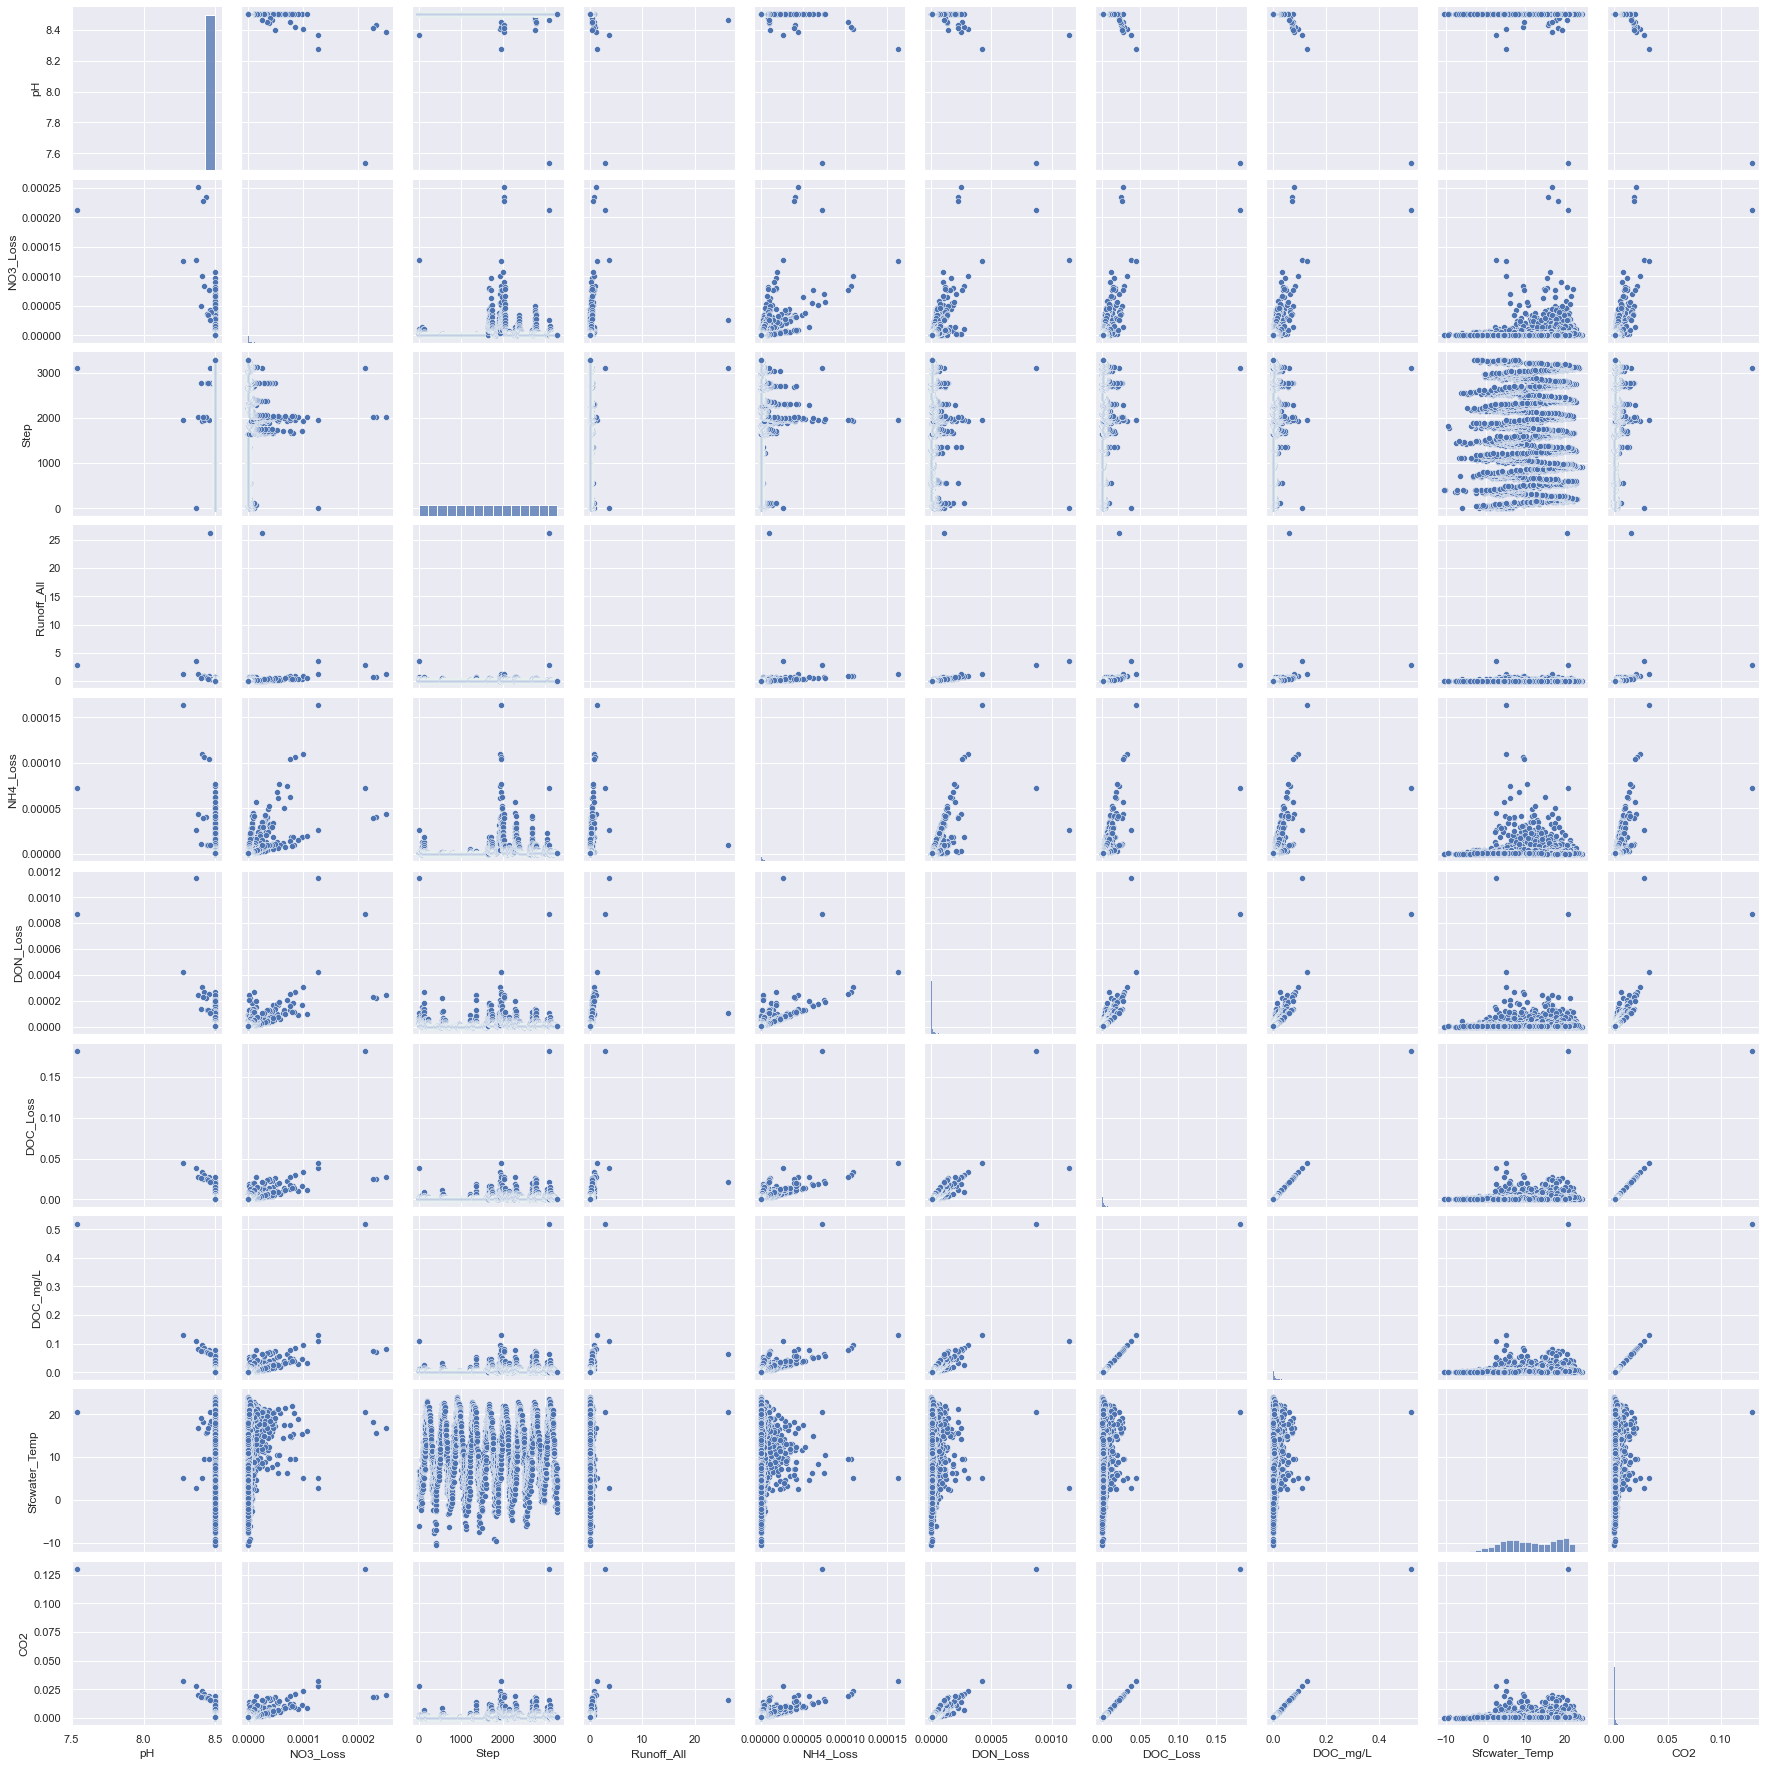

In [34]:
sns.pairplot(data_2.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

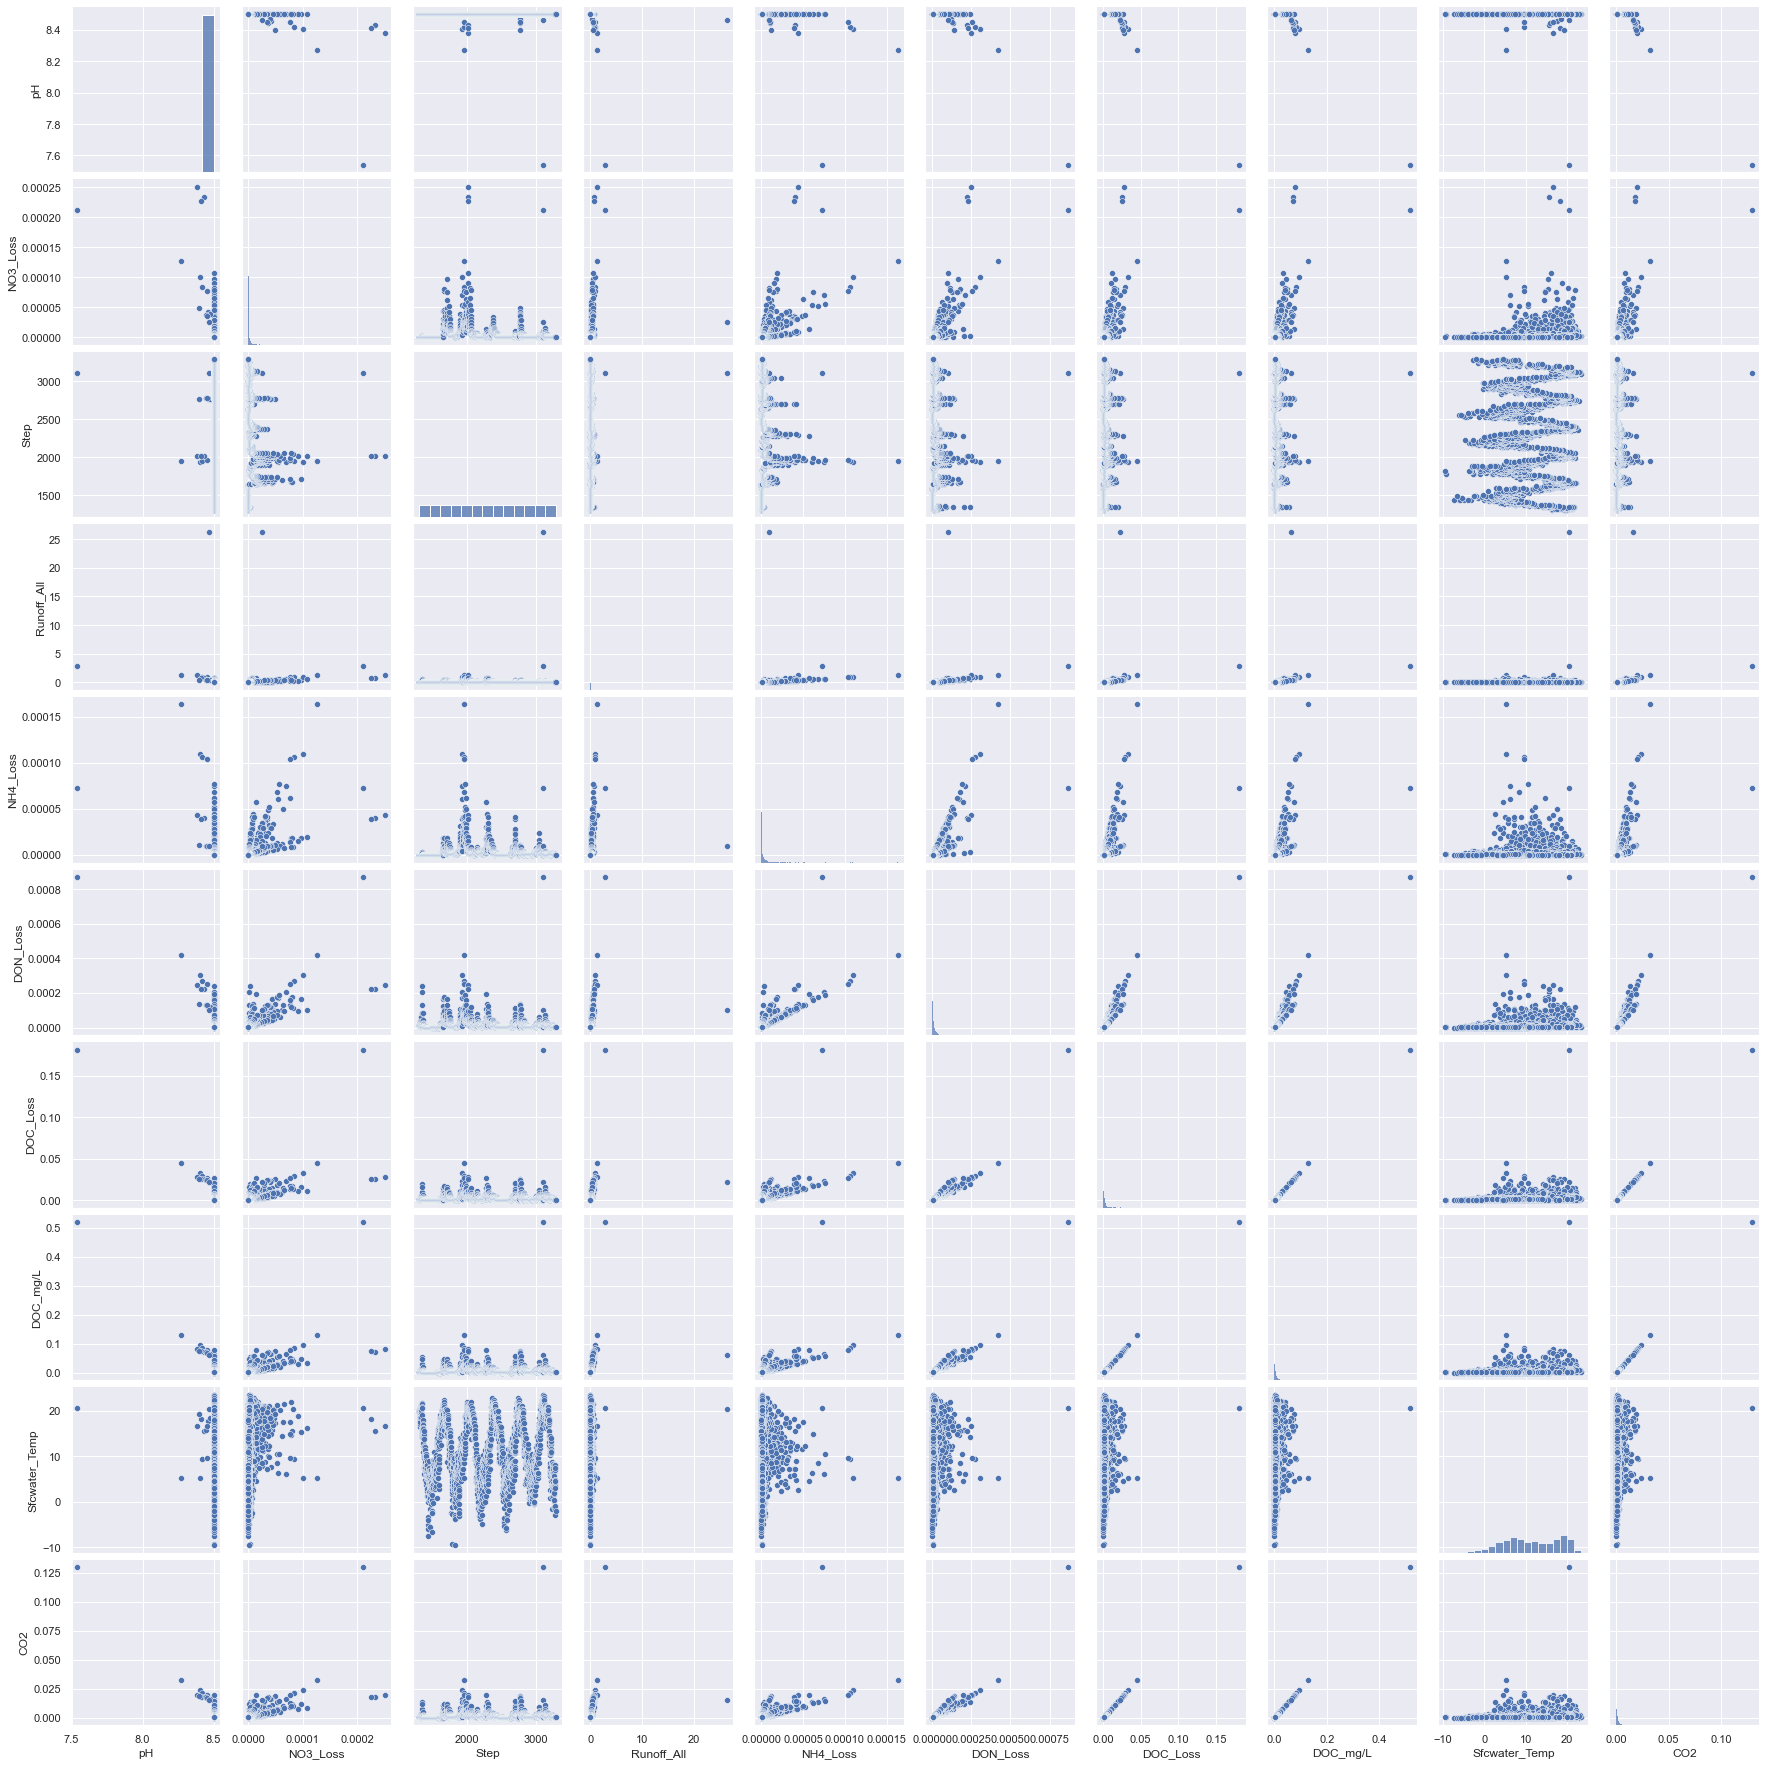

In [35]:
sns.pairplot(df_di_a.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

In [36]:
import numpy as np

In [37]:
perc = [.10, .25, .5, .75, .90]; print(type(perc));

<class 'list'>


In [38]:
data_2.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  3287.000000                            3.287000e+03   
mean      8.499352                            3.363624e-06   
std       0.017901                            1.218595e-05   
min       7.540402                            1.490396e-11   
10%       8.500000                            2.183020e-10   
25%       8.500000                            1.307555e-09   
50%       8.500000                            1.791758e-07   
75%       8.500000                            1.568081e-06   
90%       8.500000                            7.760513e-06   
max       8.500000                            2.509073e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.045830   
std                                 0.472027   
min                                 0.000014   
10%                                 0.000240   
25%                                 0.001181   
50%                                 0.008562   
75%                                 0.030329   
90%                                 0.088680   
max                                26.255497   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             2.291198e-06   
std                              7.212038e-06   
min                              1.088731e-09   
10%                              1.042981e-08   
25%                              4.258854e-08   
50%                              2.995096e-07   
75%                              1.563718e-06   
90%                              5.306916e-06   
max                              1.631130e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             1.368445e-05   
std                              3.597896e-05   
min                              1.531147e-07   
10%                              4.551896e-07   
25%                              1.189261e-06   
50%                              4.687644e-06   
75%                              1.334588e-05   
90%                              3.263766e-05   
max                              1.146204e-03   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             3287.000000  3287.000000       3287.000000   
mean                                 0.001565     0.004472         11.248536   
std                                  0.004361     0.012461          6.931090   
min                                  0.000010     0.000029        -10.562500   
10%                                  0.000028     0.000081          2.262500   
25%                                  0.000083     0.000236          5.787500   
50%                                  0.000518     0.001481         11.112499   
75%                                  0.001659     0.004741         17.712502   
90%                                  0.003639     0.010396         20.412498   
max                                  0.181567     0.518762         24.087502   

               CO2  
count  3287.000000  
mean      0.001118  
std       0.003115  
min       0.000007  
10%       0.000020  
25%       0.000059  
50%       0.000370  
75%       0.001185  
90%       0.002599  
max       0.129690

In [39]:
df_di_a.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000                            1.978000e+03   
mean      8.498992                            5.365588e-06   
std       0.022874                            1.509497e-05   
min       7.540402                            2.709118e-10   
10%       8.500000                            3.292112e-09   
25%       8.500000                            1.593290e-07   
50%       8.500000                            9.190333e-07   
75%       8.500000                            3.776951e-06   
90%       8.500000                            1.481754e-05   
max       8.500000                            2.509073e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.062458   
std                                 0.600690   
min                                 0.000163   
10%                                 0.001438   
25%                                 0.005755   
50%                                 0.016546   
75%                                 0.044610   
90%                                 0.118245   
max                                26.255497   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             3.607923e-06   
std                              8.998124e-06   
min                              1.220240e-08   
10%                              7.736682e-08   
25%                              2.895565e-07   
50%                              9.684666e-07   
75%                              3.181740e-06   
90%                              8.029911e-06   
max                              1.631130e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.763795e-05   
std                              3.521129e-05   
min                              3.802385e-07   
10%                              1.220267e-06   
25%                              3.400994e-06   
50%                              7.750838e-06   
75%                              1.791175e-05   
90%                              4.038676e-05   
max                              8.704800e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.002384     0.006812         11.347358   
std                                  0.005370     0.015342          6.693310   
min                                  0.000030     0.000086         -9.512501   
10%                                  0.000134     0.000382          2.765000   
25%                                  0.000487     0.001391          6.162500   
50%                                  0.001214     0.003468         11.300000   
75%                                  0.002560     0.007314         17.562500   
90%                                  0.005035     0.014386         20.037498   
max                                  0.181567     0.518762         23.487500   

               CO2  
count  1978.000000  
mean      0.001703  
std       0.003835  
min       0.000021  
10%       0.000096  
25%       0.000348  
50%       0.000867  
75%       0.001829  
90%       0.003596  
max       0.129690

In [40]:
df_di_a.loc[df_di_a['Condition'] == 'Prefire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  313.0                            3.130000e+02   
mean     8.5                            5.835452e-08   
std      0.0                            2.086666e-07   
min      8.5                            2.709118e-10   
10%      8.5                            3.205971e-10   
25%      8.5                            3.846846e-10   
50%      8.5                            8.650339e-10   
75%      8.5                            2.948512e-08   
90%      8.5                            1.374771e-07   
max      8.5                            2.280195e-06   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.013547   
std                                 0.055060   
min                                 0.000163   
10%                                 0.000211   
25%                                 0.000280   
50%                                 0.000949   
75%                                 0.005879   
90%                                 0.027047   
max                                 0.669258   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.218741e-07   
std                              2.809914e-07   
min                              1.220240e-08   
10%                              1.596332e-08   
25%                              2.642340e-08   
50%                              5.344822e-08   
75%                              1.043233e-07   
90%                              2.332056e-07   
max                              3.163735e-06   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             6.807129e-06   
std                              2.166088e-05   
min                              3.802385e-07   
10%                              4.348105e-07   
25%                              5.143204e-07   
50%                              1.097996e-06   
75%                              4.445561e-06   
90%                              1.506587e-05   
max                              2.428741e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              313.000000  313.000000        313.000000   
mean                                 0.000535    0.001528          9.384385   
std                                  0.001701    0.004860          6.408665   
min                                  0.000030    0.000086         -7.412499   
10%                                  0.000034    0.000098          2.187500   
25%                                  0.000041    0.000116          5.037500   
50%                                  0.000087    0.000248          8.112500   
75%                                  0.000358    0.001022         14.787500   
90%                                  0.001181    0.003375         18.687500   
max                                  0.019124    0.054639         21.612500   

              CO2  
count  313.000000  
mean     0.000382  
std      0.001215  
min      0.000021  
10%      0.000025  
25%      0.000029  
50%      0.000062  
75%      0.000255  
90%      0.000844  
max      0.013660

In [41]:
df_di_a.loc[df_di_a['Condition'] == 'Postfire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                            1.665000e+03   
mean      8.498802                            6.363284e-06   
std       0.024928                            1.626088e-05   
min       7.540402                            4.042196e-08   
10%       8.500000                            1.188624e-07   
25%       8.500000                            3.562459e-07   
50%       8.500000                            1.377467e-06   
75%       8.500000                            4.897819e-06   
90%       8.500000                            1.743966e-05   
max       8.500000                            2.509073e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.071653   
std                                 0.653909   
min                                 0.001072   
10%                                 0.003261   
25%                                 0.008723   
50%                                 0.020250   
75%                                 0.053448   
90%                                 0.136591   
max                                26.255497   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             4.263258e-06   
std                              9.667762e-06   
min                              1.182035e-07   
10%                              2.717367e-07   
25%                              5.932613e-07   
50%                              1.313690e-06   
75%                              3.969226e-06   
90%                              9.334491e-06   
max                              1.631130e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.967402e-05   
std                              3.686274e-05   
min                              8.956239e-07   
10%                              2.020923e-06   
25%                              4.515224e-06   
50%                              9.091115e-06   
75%                              1.997343e-05   
90%                              4.504848e-05   
max                              8.704800e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.002732     0.007806         11.716374   
std                                  0.005740     0.016400          6.683227   
min                                  0.000156     0.000447         -9.512501   
10%                                  0.000317     0.000907          3.012500   
25%                                  0.000764     0.002183          6.462500   
50%                                  0.001489     0.004255         11.712500   
75%                                  0.002914     0.008325         18.012500   
90%                                  0.005687     0.016249         20.187500   
max                                  0.181567     0.518762         23.487500   

               CO2  
count  1665.000000  
mean      0.001951  
std       0.004100  
min       0.000112  
10%       0.000227  
25%       0.000546  
50%       0.001064  
75%       0.002081  
90%       0.004062  
max       0.129690

In [42]:
df_pools_dif = pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'})

In [43]:
df_di_a.describe()

pH_1T   Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.498992  2297.500000                            5.365588e-06   
std       0.022874   571.143736                            1.509497e-05   
min       7.540402  1309.000000                            2.709118e-10   
25%       8.500000  1803.250000                            1.593290e-07   
50%       8.500000  2297.500000                            9.190333e-07   
75%       8.500000  2791.750000                            3.776951e-06   
max       8.500000  3286.000000                            2.509073e-04   

              Step  Runoff_All(mm/day)_Delineated_Average         Year  \
count  1978.000000                            1978.000000  1978.000000   
mean   2297.500000                               0.062458  2003.769464   
std     571.143736                               0.600690     1.576393   
min    1309.000000                               0.000163  2001.000000   
25%    1803.250000                               0.005755  2002.000000   
50%    2297.500000                               0.016546  2004.000000   
75%    2791.750000                               0.044610  2005.000000   
max    3286.000000                              26.255497  2006.000000   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             3.607923e-06   
std                              8.998124e-06   
min                              1.220240e-08   
25%                              2.895565e-07   
50%                              9.684666e-07   
75%                              3.181740e-06   
max                              1.631130e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.763795e-05   
std                              3.521129e-05   
min                              3.802385e-07   
25%                              3.400994e-06   
50%                              7.750838e-06   
75%                              1.791175e-05   
max                              8.704800e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.002384     0.006812         11.347358   
std                                  0.005370     0.015342          6.693310   
min                                  0.000030     0.000086         -9.512501   
25%                                  0.000487     0.001391          6.162500   
50%                                  0.001214     0.003468         11.300000   
75%                                  0.002560     0.007314         17.562500   
max                                  0.181567     0.518762         23.487500   

               CO2  Alk_140  
count  1978.000000   1978.0  
mean      0.001703    140.0  
std       0.003835      0.0  
min       0.000021    140.0  
25%       0.000348    140.0  
50%       0.000867    140.0  
75%       0.001829    140.0  
max       0.129690    140.0

In [44]:
df_di_a_lr = df_di_a.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(df_di_a.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})



In [45]:
df_di_a_lr

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
slope     -1.090497e-06                           -3.392340e-09   1.0   
intercept  8.501497e+00                            1.315949e-05   0.0   
rvalue    -2.722884e-02                           -1.283549e-01   1.0   
p-value    2.261048e-01                            1.012333e-08   0.0   
stderr     9.006184e-07                            5.896388e-10   0.0   

           Runoff_All(mm/day)_Delineated_Average         Year  \
slope                                   0.000024     0.002713   
intercept                               0.007902  1997.536209   
rvalue                                  0.022578     0.982970   
p-value                                 0.315553     0.000000   
stderr                                  0.000024     0.000011   

           NH4_Loss(gN/day/m2)_Delineated_Average  \
slope                               -9.842833e-10   
intercept                            5.869314e-06   
rvalue                              -6.247605e-02   
p-value                              5.443204e-03   
stderr                               3.537234e-10   

           DON_Loss(gN/day/m2)_Delineated_Average  \
slope                               -4.807230e-09   
intercept                            2.868257e-05   
rvalue                              -7.797555e-02   
p-value                              5.184593e-04   
stderr                               1.382670e-09   

           DOC_Loss(gC/day/m2)_Delineated_Average      DOC_mg/L  \
slope                                4.488565e-07  1.282447e-06   
intercept                            1.353000e-03  3.865713e-03   
rvalue                               4.774352e-02  4.774352e-02   
p-value                              3.373310e-02  3.373310e-02   
stderr                               2.112536e-07  6.035817e-07   

           Sfc_Water_Temp_C           CO2  Alk_140  
slope              0.000758  3.206118e-07      0.0  
intercept          9.606002  9.664283e-04    140.0  
rvalue             0.064675  4.774352e-02      0.0  
p-value            0.004007  3.373310e-02      1.0  
stderr             0.000263  1.508954e-07      0.0

In [46]:
df_pools_dif.head()

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            4.914788                          178.332923   
1                            4.915756                          178.490644   
2                            4.916769                          178.652420   
3                            4.917760                          178.812267   
4                            4.918732                          178.964615   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                            0.653125                            0.017828   
1                            0.656919                            0.018524   
2                            0.652829                            0.018773   
3                            0.649688                            0.018661   
4                            0.648913                            0.018417   

   Step  Runoff_All(mm/day)_Delineated_Average  
0  1309                               0.014678  
1  1310                               0.022895  
2  1311                               0.028913  
3  1312                               0.020604  
4  1313                               0.015854

In [47]:
df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values; 
df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
df_di_a['NO3_Pool'] = df_pools_dif['NO3_Pool(gN/m2)_Delineated_Average'].values;
datetime_series = pd.date_range('1998-01-01', periods=3287, freq='D'); #When no date file is executed from DOC Check
datetime_series[1309:3288];
df_di_a['Date'] = datetime_series[1309:3288].values;

<ipython-input-47-e3b78498b3f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values;
<ipython-input-47-e3b78498b3f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
<ipython-input-47-e3b78498b3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [48]:
df_di_a['Criteria'] = str('Meets')

<ipython-input-48-63546f0ec94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['Criteria'] = str('Meets')


In [49]:
df_di_a.describe(percentiles=perc)

pH_1T   Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.498992  2297.500000                            5.365588e-06   
std       0.022874   571.143736                            1.509497e-05   
min       7.540402  1309.000000                            2.709118e-10   
10%       8.500000  1506.700000                            3.292112e-09   
25%       8.500000  1803.250000                            1.593290e-07   
50%       8.500000  2297.500000                            9.190333e-07   
75%       8.500000  2791.750000                            3.776951e-06   
90%       8.500000  3088.300000                            1.481754e-05   
max       8.500000  3286.000000                            2.509073e-04   

              Step  Runoff_All(mm/day)_Delineated_Average         Year  \
count  1978.000000                            1978.000000  1978.000000   
mean   2297.500000                               0.062458  2003.769464   
std     571.143736                               0.600690     1.576393   
min    1309.000000                               0.000163  2001.000000   
10%    1506.700000                               0.001438  2002.000000   
25%    1803.250000                               0.005755  2002.000000   
50%    2297.500000                               0.016546  2004.000000   
75%    2791.750000                               0.044610  2005.000000   
90%    3088.300000                               0.118245  2006.000000   
max    3286.000000                              26.255497  2006.000000   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             3.607923e-06   
std                              8.998124e-06   
min                              1.220240e-08   
10%                              7.736682e-08   
25%                              2.895565e-07   
50%                              9.684666e-07   
75%                              3.181740e-06   
90%                              8.029911e-06   
max                              1.631130e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.763795e-05   
std                              3.521129e-05   
min                              3.802385e-07   
10%                              1.220267e-06   
25%                              3.400994e-06   
50%                              7.750838e-06   
75%                              1.791175e-05   
90%                              4.038676e-05   
max                              8.704800e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.002384     0.006812         11.347358   
std                                  0.005370     0.015342          6.693310   
min                                  0.000030     0.000086         -9.512501   
10%                                  0.000134     0.000382          2.765000   
25%                                  0.000487     0.001391          6.162500   
50%                                  0.001214     0.003468         11.300000   
75%                                  0.002560     0.007314         17.562500   
90%                                  0.005035     0.014386         20.037498   
max                                  0.181567     0.518762         23.487500   

               CO2  Alk_140     DOC_Pool     NH4_Pool     NO3_Pool  
count  1978.000000   1978.0  1978.000000  1978.000000  1978.000000  
mean      0.001703    140.0   341.321452     2.924672     0.587975  
std       0.003835      0.0   107.961020     1.178387     0.353027  
min       0.000021    140.0   178.332923     0.635450     0.001144  
10%       0.000096    140.0   189.913659     1.065405     0.003425

In [50]:
df_di_a.head()

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1309    8.5        1309                            9.611053e-08  1309   
1310    8.5        1310                            1.380026e-07  1310   
1311    8.5        1311                            1.859202e-07  1311   
1312    8.5        1312                            1.394651e-07  1312   
1313    8.5        1313                            1.088340e-07  1313   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1309                               0.014678  2001   
1310                               0.022895  2001   
1311                               0.028913  2001   
1312                               0.020604  2001   
1313                               0.015854  2001   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.970613e-08   
1310                            1.433409e-07   
1311                            1.811090e-07   
1312                            1.315001e-07   
1313                            1.030429e-07   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000009   
1310                                0.000012   
1311                                0.000016   
1312                                0.000012   
1313                                0.000010   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.000690  0.001971         20.112500   
1310                                0.000950  0.002714         19.737500   
1311                                0.001262  0.003605         19.962502   
1312                                0.000953  0.002724         19.812500   
1313                                0.000755  0.002158         19.287498   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  \
1309  0.000493      140   Prefire    Meets  178.332923  0.653125  0.017828   
1310  0.000678      140   Prefire    Meets  178.490644  0.656919  0.018524   
1311  0.000901      140   Prefire    Meets  178.652420  0.652829  0.018773   
1312  0.000681      140   Prefire    Meets  178.812267  0.649688  0.018661   
1313  0.000540      140   Prefire    Meets  178.964615  0.648913  0.018417   

           Date  
1309 2001-08-02  
1310 2001-08-03  
1311 2001-08-04  
1312 2001-08-05  
1313 2001-08-06

In [51]:
#Defining all as Meets so that the .loc of the criteria mask will set the criteria to exceeds
df_di_a['Criteria'].unique()

array(['Meets'], dtype=object)

In [52]:
#Setting EPA Criteria Mask for those days where exceedance occured for NH4 or NO3 based on pH calculation
criteria_mask = df_di_a[((df_di_a['NH4_Pool'] > 0.569) & (df_di_a['pH_1T'] == 8.5) | ((df_di_a['NH4_Pool'] >  1.27) & (df_di_a['pH_1T'] == 8.0)) | (df_di_a['NO3_Pool'] > 1.59))];

In [53]:
#Those that 'exceed' drink water standards
criteria_mask
#export criteria mask to csv
#criteria_mask.to_csv('11192115NOV21A_WQX_Exceedance.csv')

In [54]:
df_di_a['Criteria'].loc[criteria_mask.index] = str('Exceeds')

C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [55]:
df_di_a['Criteria'].unique()

array(['Exceeds', 'Meets'], dtype=object)

In [56]:
criteria_mask.drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC15NOV21a_exceed_allstats.csv')

In [57]:
criteria_mask.loc[criteria_mask['Condition'] == 'Prefire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC15NOV21a_exceed_pfstats.csv')

In [58]:
criteria_mask.loc[criteria_mask['Condition'] == 'Postfire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Unnamed: 0', 'Step', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC15NOV21a_exceed_pofstats.csv')

In [59]:
bc_pf = df_di_a.loc[df_di_a['Condition'] == 'Prefire']; bc_pf.head()

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1309    8.5        1309                            9.611053e-08  1309   
1310    8.5        1310                            1.380026e-07  1310   
1311    8.5        1311                            1.859202e-07  1311   
1312    8.5        1312                            1.394651e-07  1312   
1313    8.5        1313                            1.088340e-07  1313   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1309                               0.014678  2001   
1310                               0.022895  2001   
1311                               0.028913  2001   
1312                               0.020604  2001   
1313                               0.015854  2001   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.970613e-08   
1310                            1.433409e-07   
1311                            1.811090e-07   
1312                            1.315001e-07   
1313                            1.030429e-07   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000009   
1310                                0.000012   
1311                                0.000016   
1312                                0.000012   
1313                                0.000010   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.000690  0.001971         20.112500   
1310                                0.000950  0.002714         19.737500   
1311                                0.001262  0.003605         19.962502   
1312                                0.000953  0.002724         19.812500   
1313                                0.000755  0.002158         19.287498   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  \
1309  0.000493      140   Prefire  Exceeds  178.332923  0.653125  0.017828   
1310  0.000678      140   Prefire  Exceeds  178.490644  0.656919  0.018524   
1311  0.000901      140   Prefire  Exceeds  178.652420  0.652829  0.018773   
1312  0.000681      140   Prefire  Exceeds  178.812267  0.649688  0.018661   
1313  0.000540      140   Prefire  Exceeds  178.964615  0.648913  0.018417   

           Date  
1309 2001-08-02  
1310 2001-08-03  
1311 2001-08-04  
1312 2001-08-05  
1313 2001-08-06

In [60]:
bc_pf_lr = bc_pf.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pf.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [61]:
#Brush Creek Pre-fire linear #.to_csv('111921BC15NOV21a_pflr.csv')regression
bc_pf_lr;
#bc_pf_lr.to_csv('111921BC15NOV21a_pflr.csv')

In [62]:
bc_pof = df_di_a.loc[df_di_a['Condition'] == 'Postfire'] 
bc_pof.head()
#bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1622    8.5        1622                            1.220085e-07  1622   
1623    8.5        1623                            1.433888e-07  1623   
1624    8.5        1624                            1.722085e-07  1624   
1625    8.5        1625                            1.735690e-07  1625   
1626    8.5        1626                            1.787576e-07  1626   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1622                               0.019813  2002   
1623                               0.020648  2002   
1624                               0.020426  2002   
1625                               0.017420  2002   
1626                               0.015321  2002   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1622                            2.897305e-07   
1623                            3.446746e-07   
1624                            4.000481e-07   
1625                            3.878383e-07   
1626                            3.850368e-07   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1622                                0.000012   
1623                                0.000012   
1624                                0.000012   
1625                                0.000011   
1626                                0.000010   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1622                                0.000967  0.002762         17.262500   
1623                                0.000978  0.002793         15.687500   
1624                                0.001005  0.002871         18.387500   
1625                                0.000873  0.002495         16.662500   
1626                                0.000790  0.002258         15.012501   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  \
1622  0.000690      140  Postfire  Exceeds  195.564401  0.850320  0.016252   
1623  0.000698      140  Postfire  Exceeds  195.853250  0.887170  0.018690   
1624  0.000718      140  Postfire  Exceeds  196.235439  0.919591  0.021644   
1625  0.000624      140  Postfire  Exceeds  196.556440  0.952313  0.024904   
1626  0.000565      140  Postfire  Exceeds  196.824668  0.983167  0.028150   

           Date  
1622 2002-06-11  
1623 2002-06-12  
1624 2002-06-13  
1625 2002-06-14  
1626 2002-06-15

In [63]:
bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0', 'Year', 'Step'})

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                            1.665000e+03   
mean      8.498802                            6.363284e-06   
std       0.024928                            1.626088e-05   
min       7.540402                            4.042196e-08   
10%       8.500000                            1.188624e-07   
25%       8.500000                            3.562459e-07   
50%       8.500000                            1.377467e-06   
75%       8.500000                            4.897819e-06   
90%       8.500000                            1.743966e-05   
max       8.500000                            2.509073e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.071653   
std                                 0.653909   
min                                 0.001072   
10%                                 0.003261   
25%                                 0.008723   
50%                                 0.020250   
75%                                 0.053448   
90%                                 0.136591   
max                                26.255497   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             4.263258e-06   
std                              9.667762e-06   
min                              1.182035e-07   
10%                              2.717367e-07   
25%                              5.932613e-07   
50%                              1.313690e-06   
75%                              3.969226e-06   
90%                              9.334491e-06   
max                              1.631130e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.967402e-05   
std                              3.686274e-05   
min                              8.956239e-07   
10%                              2.020923e-06   
25%                              4.515224e-06   
50%                              9.091115e-06   
75%                              1.997343e-05   
90%                              4.504848e-05   
max                              8.704800e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.002732     0.007806         11.716374   
std                                  0.005740     0.016400          6.683227   
min                                  0.000156     0.000447         -9.512501   
10%                                  0.000317     0.000907          3.012500   
25%                                  0.000764     0.002183          6.462500   
50%                                  0.001489     0.004255         11.712500   
75%                                  0.002914     0.008325         18.012500   
90%                                  0.005687     0.016249         20.187500   
max                                  0.181567     0.518762         23.487500   

               CO2  Alk_140     DOC_Pool     NH4_Pool     NO3_Pool  
count  1665.000000   1665.0  1665.000000  1665.000000  1665.000000  
mean      0.001951    140.0   370.009209     3.288192     0.697432  
std       0.004100      0.0    92.960547     0.895848     0.268897  
min       0.000112    140.0   195.564401     0.850320     0.016252  
10%       0.000227    140.0   246.611681     2.055975     0.314963  
25%       0.000546    140.0   290.727583     2.712268     0.530161  
50%       0.001064    140.0   382.253723     3.165099     0.694792  
75%       0.002081    140.0   456.486947     4.002294     0.905821  
90%       0.004062    140.0   495.343419     4.607436     1.025042  
max       0.129690    140.0   528.185250     5.008792     1.503220

In [64]:
bc_pof_lr = bc_pof.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pof.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [65]:
bc_pof_lr;
#bc_pof_lr.to_csv('111921BC15NOV21a_poflr.csv')

In [66]:
 #Oneway ANOVA between pre and post fire nitrates
stats.f_oneway(bc_pf['NO3_Pool'], bc_pof['NO3_Pool'])

F_onewayResult(statistic=2070.172640374543, pvalue=7.53220272808467e-310)

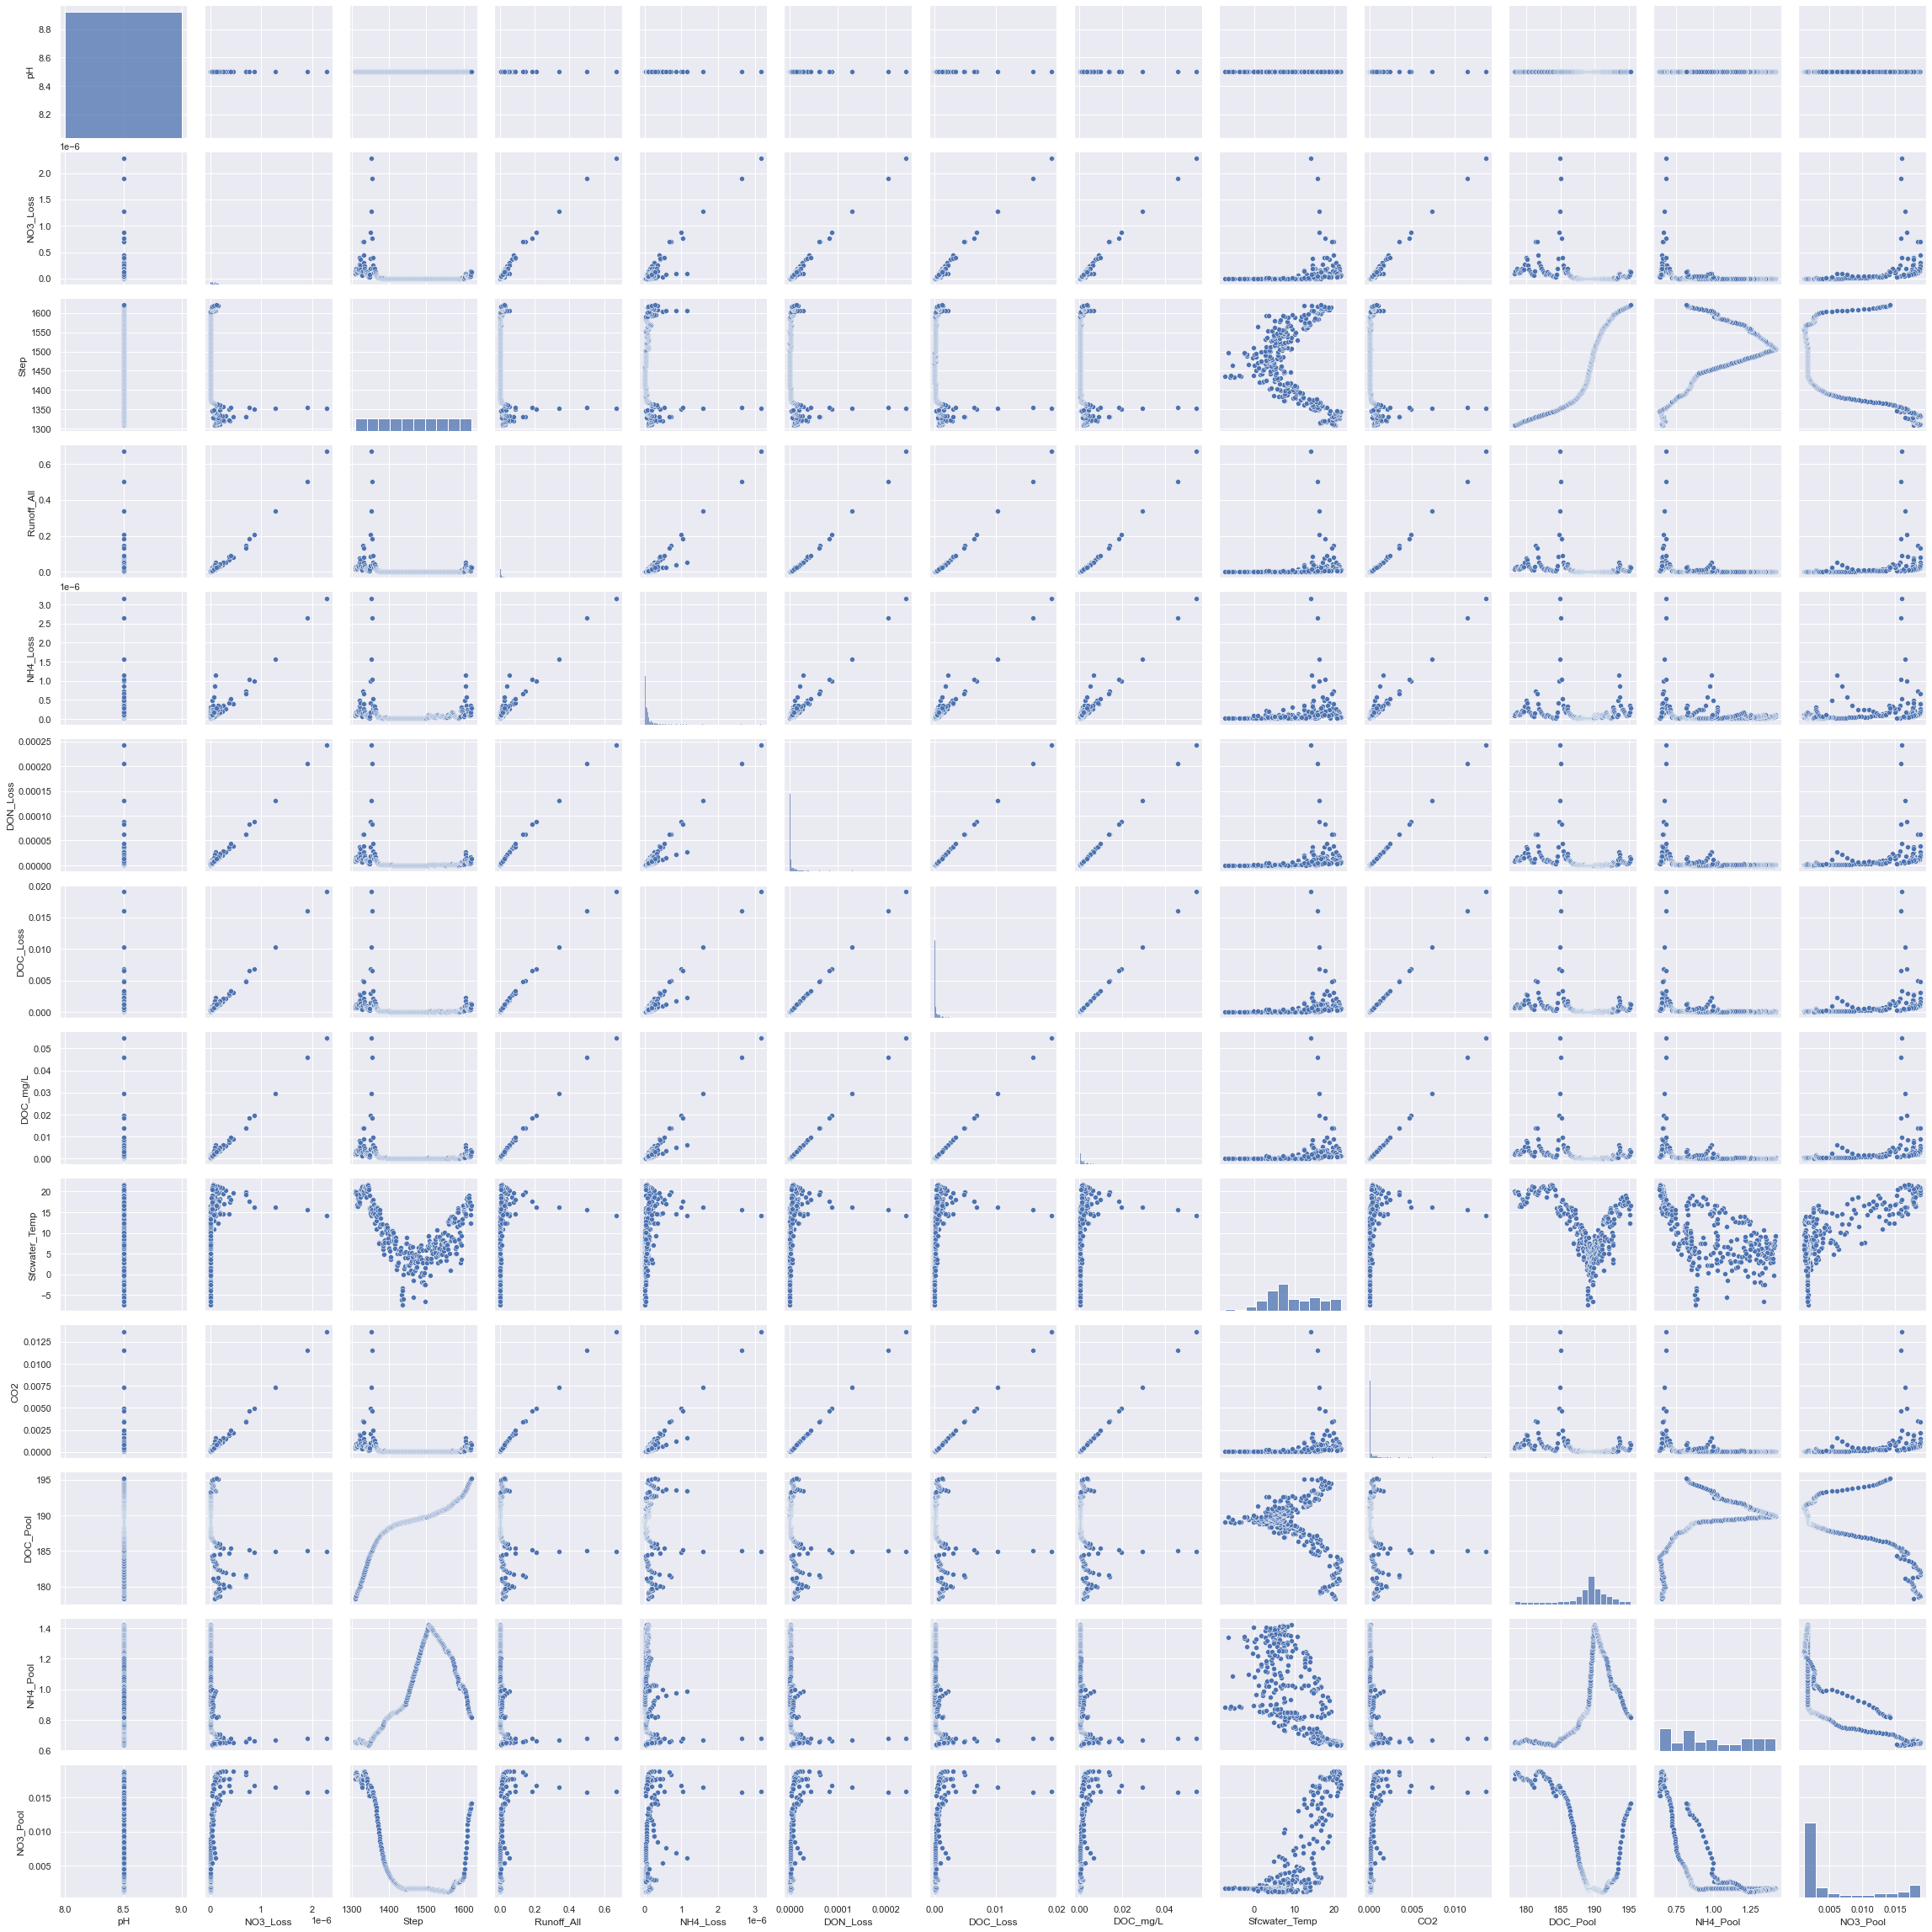

In [67]:
sns.pairplot(bc_pf.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

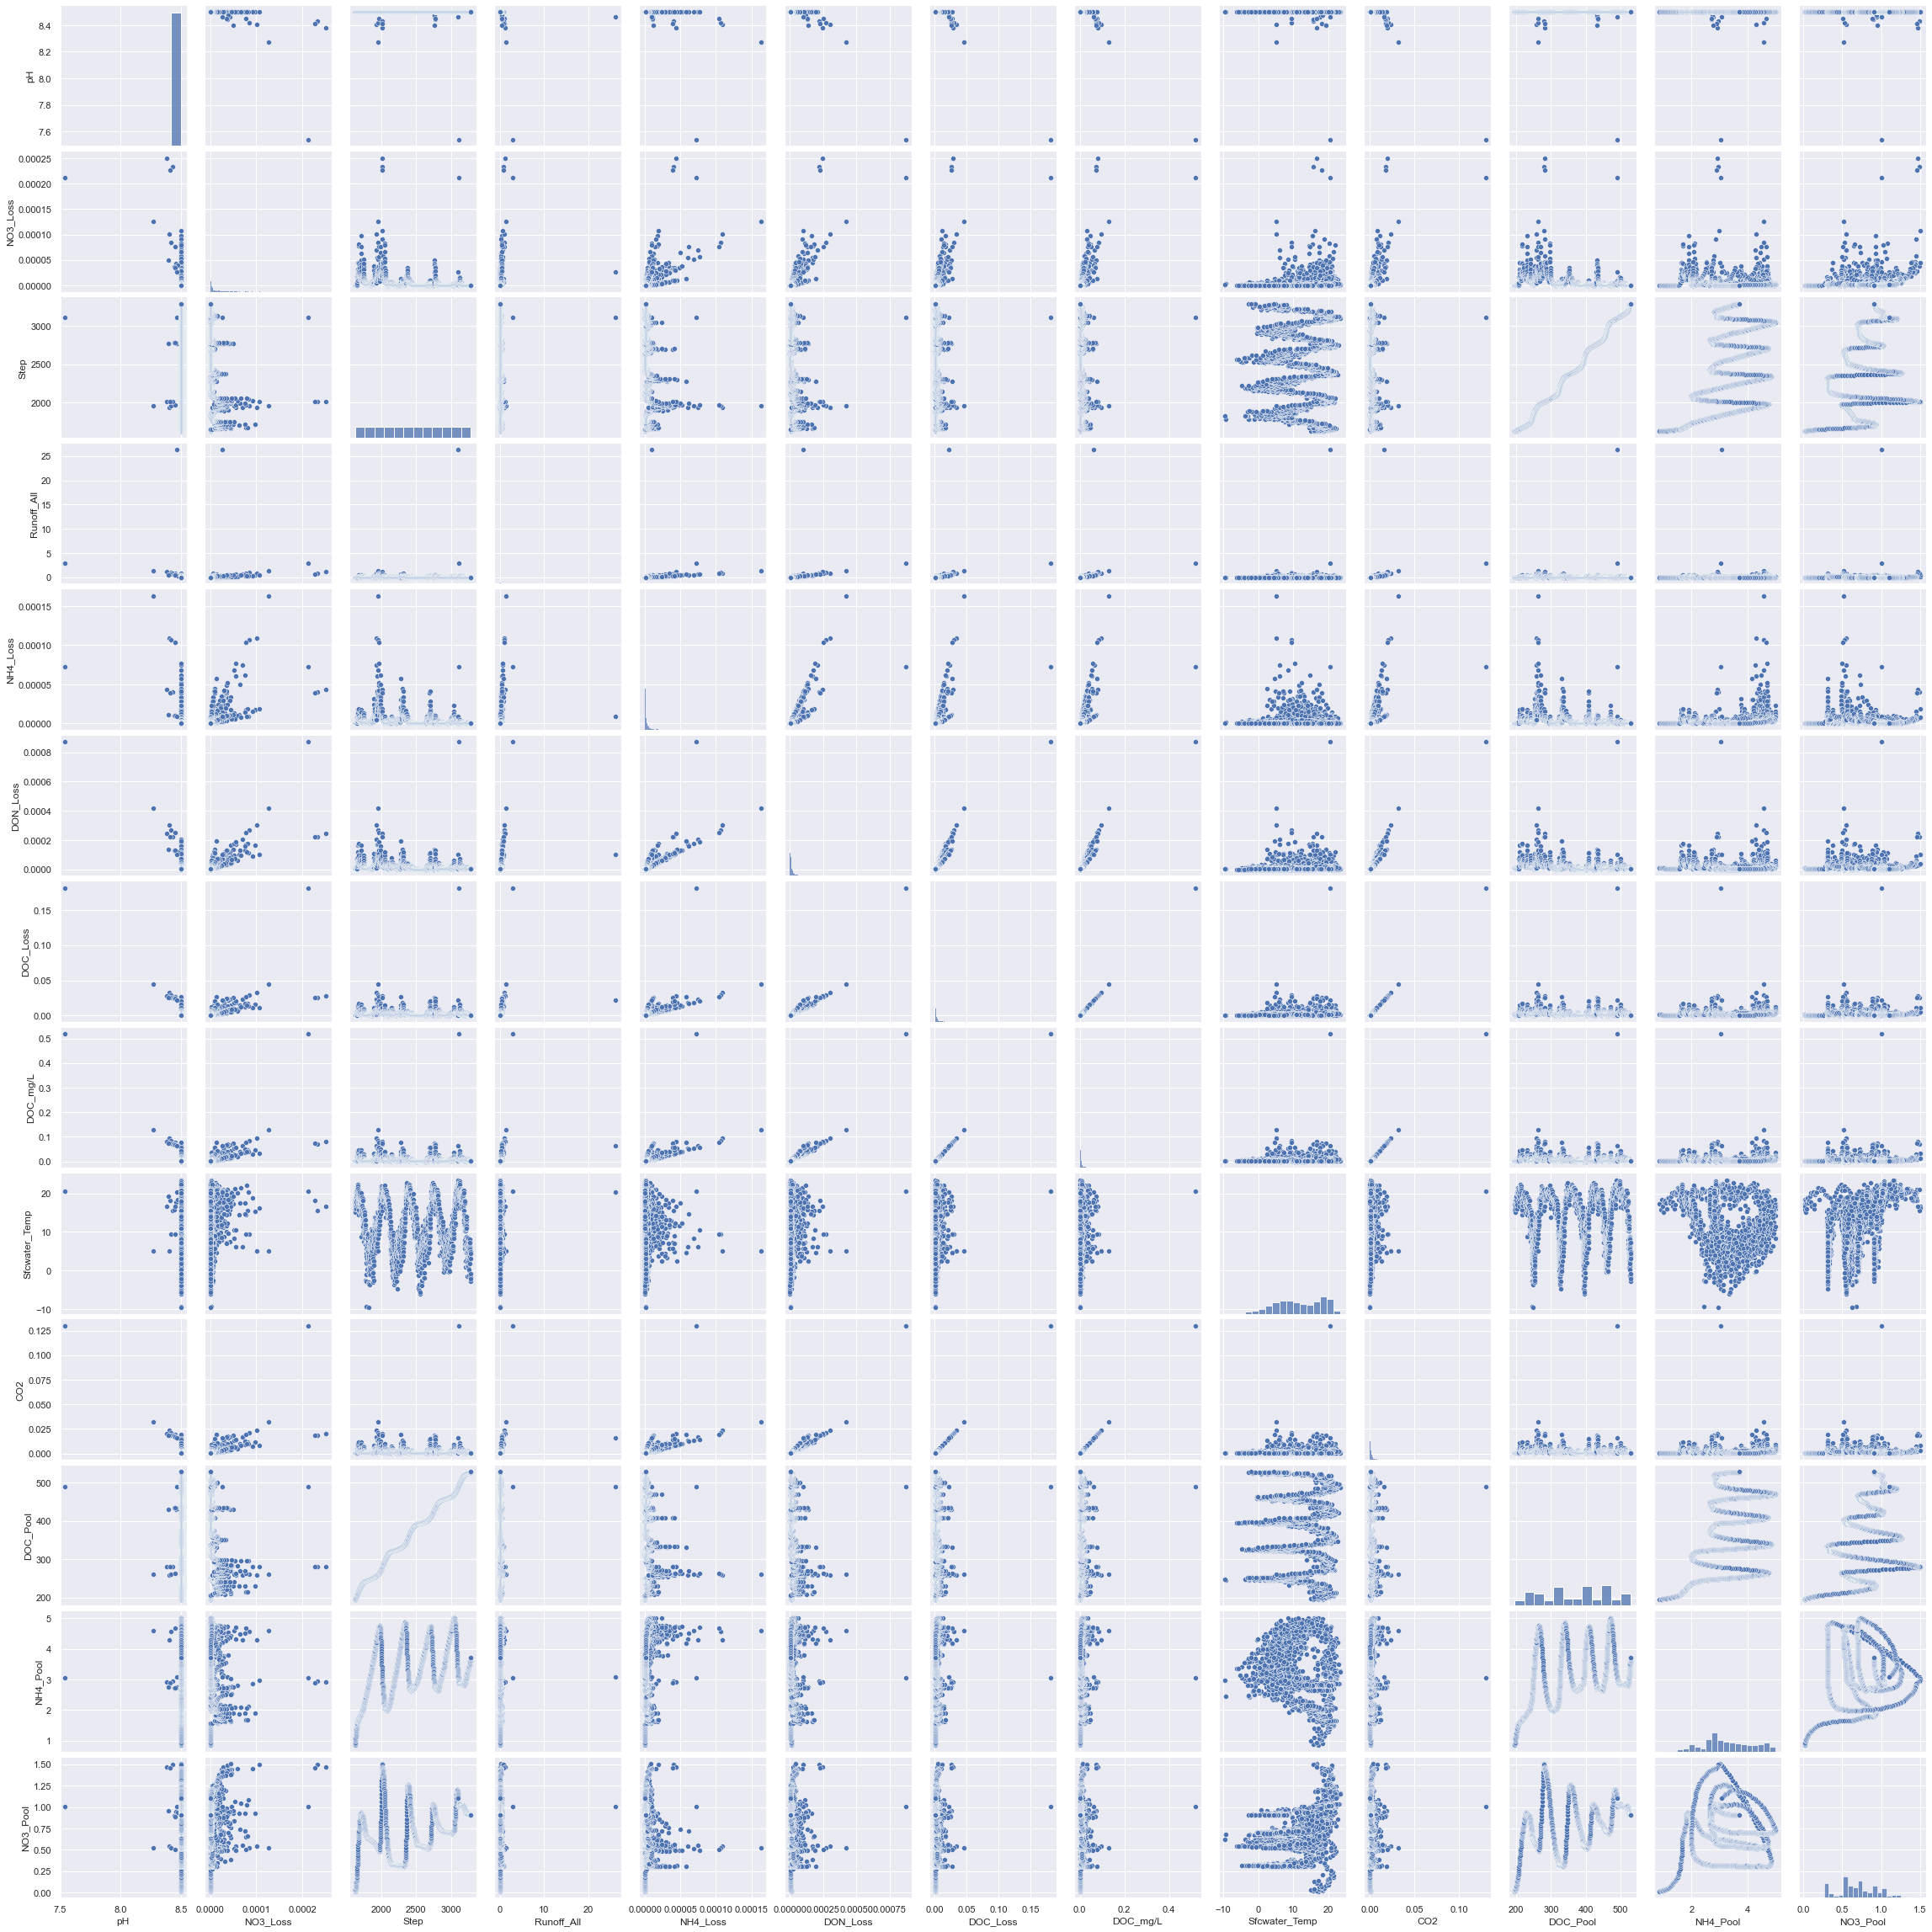

In [68]:
sns.pairplot(bc_pof.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

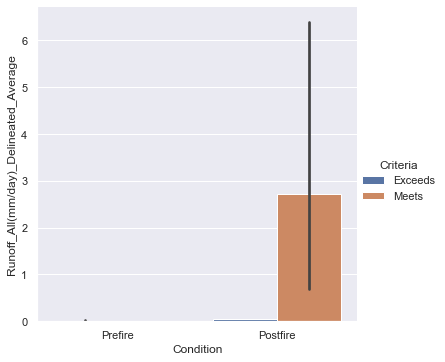

In [69]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Runoff_All(mm/day)_Delineated_Average',
            hue='Criteria')

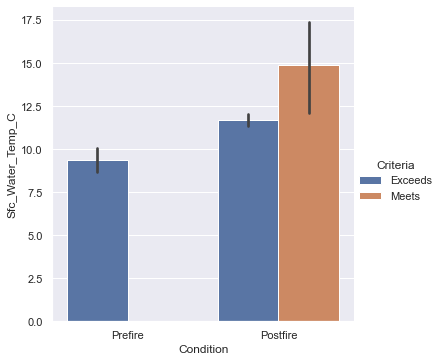

In [70]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Sfc_Water_Temp_C',
            hue='Criteria')

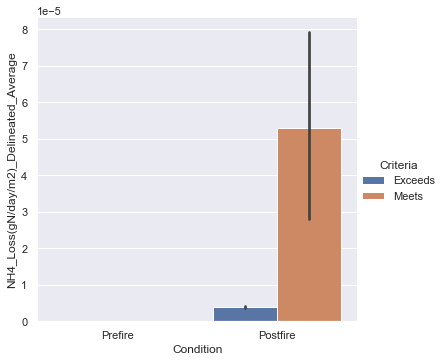

In [71]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

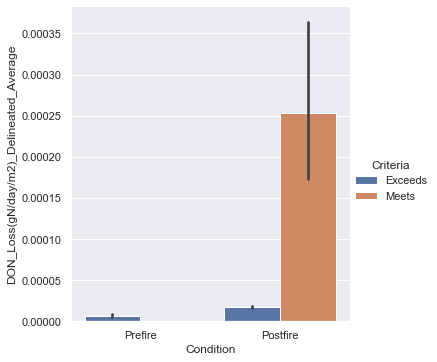

In [72]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DON_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

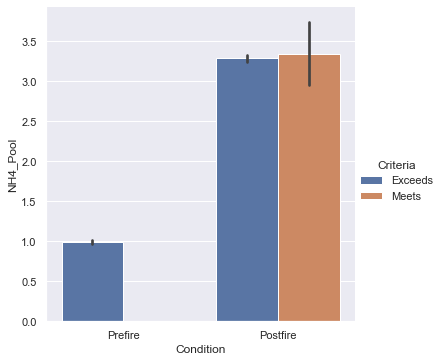

In [73]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Pool',
            hue='Criteria')

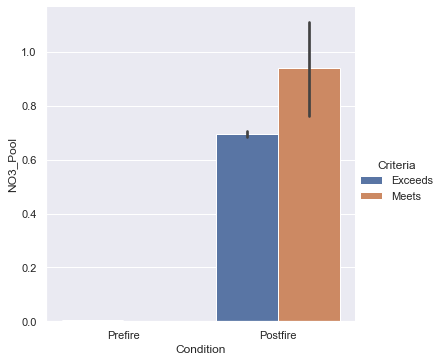

In [74]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NO3_Pool',
            hue='Criteria')

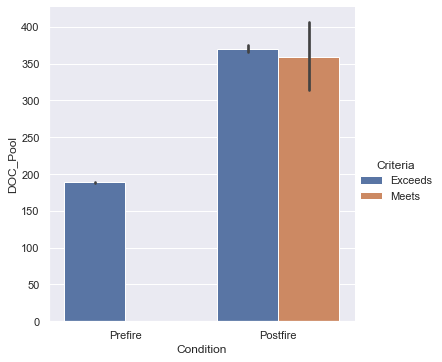

In [75]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Pool',
            hue='Criteria')

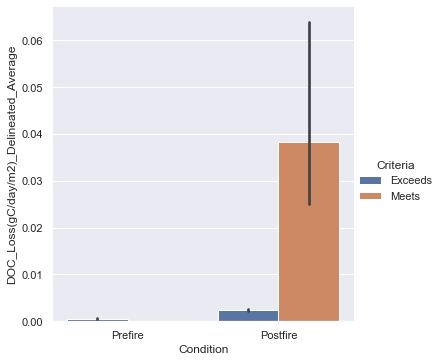

In [76]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Loss(gC/day/m2)_Delineated_Average',
            hue='Criteria')

In [77]:
df_di_a#.to_csv('111921_BC15NOV21A_WQX_All_di.csv')

In [78]:
calc_pH(0.7, 22.9, 4.7, 50)

CO2 Estimate 15.909090909090908
Exponent value 5.853692464000001
H2CO3 value 1.400578760267948e-06
pkw= 1e-14
Alpha value= 2.2281934832444628e-05
SQRT of Alpha= 0.004720374437737395
A value 2.326023550138511
B value 0.43429448190325176
C value 0.00944074887547479



6.232002101795975

In [79]:
#data_df.loc[:,['new_ph_column']]=data_df.apply(lambda row: calc_pH(row['CO2_calc'],row['Sfcwater_Temp_C'],row['DOC_mg/L'], row['Alk_200']),axis=1)


In [80]:
#data_df.head()